# Predicting BMI

Using classification models from Python's Sklearn library in predicting BMI for panelists with missing BMI information


# Importing Libraries

In [1]:
import re
import xlrd
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.discrete.discrete_model as sf
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
pd.set_option("display.max_rows", None, "display.max_columns", None)
import math
import string
import re
# import holidays 

In [2]:
# main_df = pd.read_csv('labelled_df_option3_nonscaled_3clusters.csv', parse_dates = ['Date'])


main_df = pd.read_csv('../Hackerthon_data/labelled_df_option3_nonscaled_3clusters.csv', parse_dates = ['Date'])
temp_dl = pd.read_csv('temp_dl.csv')
# for filters - latest year
#temp_dl = temp_dl[temp_dl['Date'] >= '2019-06-14']



In [3]:
temp_dl.head()

,Unnamed: 0,Panel ID,Alcohol,Baby_Food,Cooking_stuff,Dairy,Drinks,Instant,Luxury_goods,Snacks,Spreads,Sweets,Tea_Coffee,ID,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location
0,0,Panel 101011101,0.0,0.0,35.300000,1.718421,2.113158,1.842105,0.0,1.144737,1.126316,0.381579,0.326316,Panel 101011101,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North
1,1,Panel 101016101,0.0,0.0,14.588462,4.453846,1.611538,0.000000,0.0,1.334615,0.850000,0.000000,0.000000,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,1-3 Member HH,North
2,2,Panel 101019101,0.0,0.0,28.876000,1.380000,6.564000,3.762000,0.0,0.700000,0.060000,0.636000,12.398000,Panel 101019101,Obese,Income < 1500,North Malay,Teens Aches,Urban,4 Member HH,North
3,3,Panel 101024101,0.0,0.0,8.506000,3.728000,5.026000,11.820000,0.0,3.156000,0.728000,0.224000,3.078000,Panel 101024101,Over Weight,Income 1500 - 1999,North Chinese,Nesting Families,Urban,1-3 Member HH,North
4,4,Panel 105009103,0.0,0.0,13.439623,1.647170,6.522642,2.343396,0.0,2.116981,0.000000,0.518868,2.139623,Panel 105009103,Over Weight,Income < 1500,North Malay,Empty Nesters,Rural,1-3 Member HH,North


Counts for each BMI Category

# Importing Dataset

In [4]:
main_df.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend,Year,Month,Calories/100g,Price per Volume,BMI,Income,Ethnicity,Lifestage,Strata,#HH,location,InvoiceNo,#HH_numeric,Volume grams,Calories,Is Budget,Recency,Frequency,Monetary,R,F,M,RFM,Customer Segment,Fats/100g,Sugar/100g,Nutrition_Category,Fats,Sugar,Broad Category,Labels
0,Panel 101011101,2019-06-23,Sugar,2,2.0,9.0,2019,6,405,2.94,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,IN_000000,2,2000.0,8100.0,0,14,38,1670.2,2,3,3,233,Needs Attention,0.0,100.0,Extremely high calorie and fatty food,0.0,2000.0,Cooking_stuff,2
1,Panel 101011101,2019-06-23,Cordials,1,1.0,8.7,2019,6,164,8.96,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,IN_000000,2,1000.0,1640.0,1,14,38,1670.2,2,3,3,233,Needs Attention,0.0,18.1,High calorie and low sugar food,0.0,181.0,Drinks,2
2,Panel 101011101,2019-06-30,Eggs,1,30.0,8.1,2019,6,97,0.37,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,IN_000001,2,1500.0,1455.0,1,14,38,1670.2,2,3,3,233,Needs Attention,6.3,0.2,High calorie and low sugar food,94.5,3.0,Cooking_stuff,2
3,Panel 101011101,2019-06-30,Canned Product,1,0.2,3.3,2019,6,150,14.60,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,IN_000001,2,200.0,300.0,0,14,38,1670.2,2,3,3,233,Needs Attention,12.7,0.0,High calorie and low sugar food,25.4,0.0,Instant,2
4,Panel 101011101,2019-06-30,Bouilon,1,0.1,3.1,2019,6,16,29.09,Obese,Income 1500 - 1999,North Malay,Empty Nesters,Urban,1-3 Member HH,North,IN_000001,2,100.0,16.0,0,14,38,1670.2,2,3,3,233,Needs Attention,1.0,0.0,High calorie and low sugar food,1.0,0.0,Cooking_stuff,2


### Rename 
1. Category to unique basket size
2. #HH to HH
Round the basket size by <code>Ceil</code>


In [5]:
main_df = main_df.rename({"Category":"UniqueBasketSize","#HH_numeric":'HH_numeric',"location":"Location"}, axis = 'columns')


Merge Obese and Overweight    
Since the Healthy bmi panelists was significantly larger than the non healthy bmi panelists, and to prevent models from generalizing all BMIs as Healthy,     
Obese and Overweight BMIs would be merged to form a significant proportion of the dataset too.

In [6]:
main_df['BMI'].value_counts()

Healthy         182055
Over Weight     125389
Obese            72009
Under Weight     66011
Name: BMI, dtype: int64

In [7]:

main_df['BMI'] = main_df['BMI'].replace(['Over Weight','Obese'],'Unhealthy')


In [8]:
main_df['BMI'].value_counts()

Unhealthy       197398
Healthy         182055
Under Weight     66011
Name: BMI, dtype: int64

In [11]:
# for this person, find average calories in a transaction for each catregory
person_cal = main_df[main_df['Panel ID'] == 'Panel 133123101'].groupby(['Date','Broad Category'], 
                                                                       as_index = False).sum().groupby('Broad Category',as_index = False).mean()

In [12]:

person_cal.to_csv('person_cal.csv',index=False) # the categoricals arent one hot encoded yet

Remove extra Panel ID columns

# Data Cleaning 

<code>keep_col_numeric</code> - numerical columns to be used in dataset for model ->   <code>panel_id_numeric</code> numerical DataFrane
   


<code>keep_col_categorical</code> - categorical columns ->   <code>panel_id_categorical</code> categorical DataFrame

In [14]:
keep_col_numeric = ['Panel ID',
 'Date',
 'UniqueBasketSize', # to get unique basket size
 'Pack Size',
 'Volume grams',
 'Spend',
'Fats/100g',
'HH_numeric', #
 'Sugar/100g',
 'Calories/100g','Is Budget']
                    
keep_col_categorical = ['Panel ID',
 'BMI',
 'Income',
 'Ethnicity',
 'Lifestage',
 'Strata',
 'Location']


In [15]:
panel_id_numeric = main_df[keep_col_numeric]
panel_id_numeric.head()
panel_id_categorical = main_df[keep_col_categorical].drop_duplicates('Panel ID')
panel_id_categorical.head()

,Panel ID,BMI,Income,Ethnicity,Lifestage,Strata,Location
0,Panel 101011101,Unhealthy,Income 1500 - 1999,North Malay,Empty Nesters,Urban,North
138,Panel 101016101,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,North
235,Panel 101019101,Unhealthy,Income < 1500,North Malay,Teens Aches,Urban,North
807,Panel 101024101,Unhealthy,Income 1500 - 1999,North Chinese,Nesting Families,Urban,North
1086,Panel 105009103,Unhealthy,Income < 1500,North Malay,Empty Nesters,Rural,North


### Average of each feature per transaction


In [16]:
panel_sum = panel_id_numeric.groupby(['Panel ID','Date'], as_index=  False).agg({
    'Pack Size':'sum','Spend':'sum','UniqueBasketSize':pd.Series.nunique,'Calories/100g':'sum', 'Fats/100g':'sum','Sugar/100g':'sum', 'Is Budget':'sum',
    'Volume grams':'sum', 'HH_numeric':'mean'})
#print(panel_sum.head())
panel_sum = panel_sum.groupby('Panel ID', as_index =False).mean()

In [17]:
panel_sum.head()

,Panel ID,Pack Size,Spend,UniqueBasketSize,Calories/100g,Fats/100g,Sugar/100g,Is Budget,Volume grams,HH_numeric
0,Panel 101011101,8.394737,43.952632,3.342105,1214.157895,58.286842,78.834211,2.315789,13517.894737,2.0
1,Panel 101016101,4.692308,22.838462,3.269231,1087.384615,53.573077,56.473077,2.615385,5206.756154,2.0
2,Panel 101019101,13.100000,54.376000,8.200000,2805.880000,101.944000,296.204000,7.920000,10319.833600,4.0
3,Panel 101024101,7.340000,36.266000,4.260000,1484.340000,56.210000,52.374000,3.480000,5752.479200,2.0
4,Panel 105009103,7.830189,28.728302,7.132075,2257.452830,140.718868,95.501887,4.169811,4166.030377,2.0


In [18]:
person = panel_sum[panel_sum["Panel ID"] == "Panel 133123101"]
person['Calories'] = person['Calories/100g']*person['Volume grams']/100
person['Fats'] = person['Fats/100g']*person['Volume grams']/100
person['Sugar'] = person['Sugar/100g']*person['Volume grams']/100

D:\Anaconda\envs\main2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\main2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\main2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [19]:
person

,Panel ID,Pack Size,Spend,UniqueBasketSize,Calories/100g,Fats/100g,Sugar/100g,Is Budget,Volume grams,HH_numeric,Calories,Fats,Sugar
179,Panel 133123101,5.111111,94.552778,2.611111,839.333333,36.411111,43.527778,1.138889,3670.423056,4.0,30807.08418,1336.441817,1597.653591


### Combination of numerical and categorical columns

In [456]:
#panel_id_merge = panel_sum.merge(panel_id_nutrition, how = 'left', left_on = 'Panel ID', right_on = 'Panel ID')#.drop(['ID','Panel ID'],1)
panel_id_merge = panel_sum.merge(panel_id_categorical, how = 'left', left_on = 'Panel ID', right_on = 'Panel ID').drop('Panel ID',1)

### Remove whitespace from columns

In [457]:
panel_id_merge.head()
panel_id_merge.columns = panel_id_merge.columns.str.replace(' ','')

### Remove location from Ethnicity 
There is an overlap in location in Ethnicity , which would have multicollinearity on 2 supposedly independent features.    
Hence the location in Ethnicity would be removed.
eg:  North Malay -> Malay

In [458]:
ethnicity = panel_id_merge.copy()
ethnicity['Count'] = 1
ethnicity = ethnicity.groupby('Ethnicity').count().filter(items=['Count'])
ethnicity

,Count
Ethnicity,
Central Chinese,306
Central Malay,455
Central Others,107
East Coast Chinese,33
East Coast Malay,380
East Coast Others,11
North Chinese,207
North Malay,421
North Others,62


In [459]:
location = panel_id_merge.copy()
location['Count'] = 1
location = location.groupby('Location').count().filter(items=['Count'])
location

,Count
Location,
Central,868
East Coast,424
North,690
South,426


In [460]:
# to_remove = panel_id_merge['Location'].unique()
# panel_id_merge['Ethnicity'] = panel_id_merge['Ethnicity'].str.replace('|'.join(map(re.escape, to_remove)), '') # remove whitespace from columns


In [461]:
panel_id_merge.head()

,PackSize,Spend,UniqueBasketSize,Calories/100g,Fats/100g,Sugar/100g,IsBudget,Volumegrams,HH_numeric,BMI,Income,Ethnicity,Lifestage,Strata,Location
0,8.394737,43.952632,3.342105,1214.157895,58.286842,78.834211,2.315789,13517.894737,2.0,Unhealthy,Income 1500 - 1999,North Malay,Empty Nesters,Urban,North
1,4.692308,22.838462,3.269231,1087.384615,53.573077,56.473077,2.615385,5206.756154,2.0,Healthy,Income 1500 - 1999,North Malay,Teens Aches,Urban,North
2,13.100000,54.376000,8.200000,2805.880000,101.944000,296.204000,7.920000,10319.833600,4.0,Unhealthy,Income < 1500,North Malay,Teens Aches,Urban,North
3,7.340000,36.266000,4.260000,1484.340000,56.210000,52.374000,3.480000,5752.479200,2.0,Unhealthy,Income 1500 - 1999,North Chinese,Nesting Families,Urban,North
4,7.830189,28.728302,7.132075,2257.452830,140.718868,95.501887,4.169811,4166.030377,2.0,Unhealthy,Income < 1500,North Malay,Empty Nesters,Rural,North


### To CSV 
If you would like to use the cleaned dataframe in other programmes

In [462]:
#panel_id_merge.to_csv('panel_id_merge.csv',index=False) # the categoricals arent one hot encoded yet

# Data Preparation
- Label Encode on Categoricals
- label encode on BMI


In [463]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from patsy.builtins import Q

#### Label Encode on Categoricals


#### Removal of unique Panel ID
Since Panel ID is unique, it wont be useful for prediction

In [464]:
keep_col_categorical.remove('BMI')
keep_col_categorical.remove('Panel ID')

In [465]:
categorical_column = ['Income','Ethnicity','Lifestage','Strata','#HH','Location','#HH_numeric']

#### Mapping of categorical variables to their label encoded value

In [466]:
panel_id_merged = panel_id_merge.copy()
le_name_mapping = {}
for columns in keep_col_categorical:
    le = preprocessing.LabelEncoder()
    le.fit(panel_id_merge[columns])
    le_name_mapping[columns] = dict(zip(le.classes_, le.transform(le.classes_)))
    panel_id_merged[columns] =le.transform(panel_id_merge[columns])
    


In [467]:
#print(le_name_mapping)
print(le_name_mapping_temp)

{'Income': {'Income 1500 - 1999': 0, 'Income 2000 - 2999': 1, 'Income 3000 - 3999': 2, 'Income 4000 - 4999': 3, 'Income < 1500': 4, 'Income >5000': 5}, 'Ethnicity': {' Chinese': 0, ' Malay': 1, ' Others': 2}, 'Lifestage': {'Empty Nesters': 0, 'Matured Families': 1, 'Nesting Families': 2, 'Teens Aches': 3, 'Teens and Toddlers': 4, 'Yankys': 5}, 'Strata': {'Rural': 0, 'Urban': 1}, '#HH': {'1-3 Member HH': 0, '4 Member HH': 1, '5 Member HH': 2, '6 Member HH': 3, '7+ Member HH': 4}, 'Location': {'Central': 0, 'East Coast': 1, 'North': 2, 'South': 3}, '#HH_numeric': {2: 0, 4: 1, 5: 2, 6: 3, 7: 4}}


#### Final Dataset for model

In [468]:
panel_id_merged.head()

,PackSize,Spend,UniqueBasketSize,Calories/100g,Fats/100g,Sugar/100g,IsBudget,Volumegrams,HH_numeric,BMI,Income,Ethnicity,Lifestage,Strata,Location
0,8.394737,43.952632,3.342105,1214.157895,58.286842,78.834211,2.315789,13517.894737,2.0,Unhealthy,0,7,0,1,2
1,4.692308,22.838462,3.269231,1087.384615,53.573077,56.473077,2.615385,5206.756154,2.0,Healthy,0,7,3,1,2
2,13.100000,54.376000,8.200000,2805.880000,101.944000,296.204000,7.920000,10319.833600,4.0,Unhealthy,4,7,3,1,2
3,7.340000,36.266000,4.260000,1484.340000,56.210000,52.374000,3.480000,5752.479200,2.0,Unhealthy,0,6,2,1,2
4,7.830189,28.728302,7.132075,2257.452830,140.718868,95.501887,4.169811,4166.030377,2.0,Unhealthy,4,7,0,0,2


# Exploratory Data Analysis 
- What are some of the features that are correlated to BMI?
- What 


#### Plot for BMI against each feature in dataset

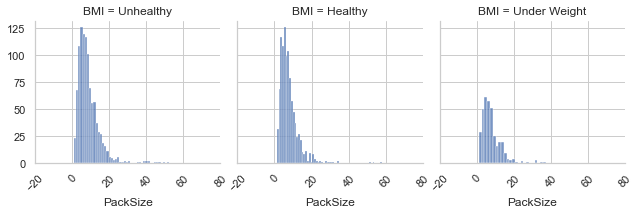

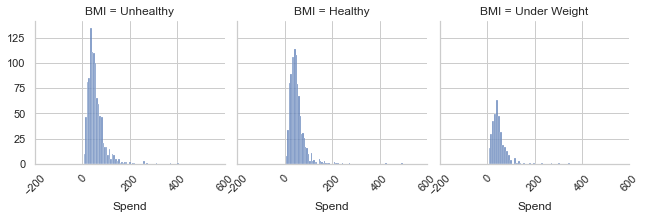

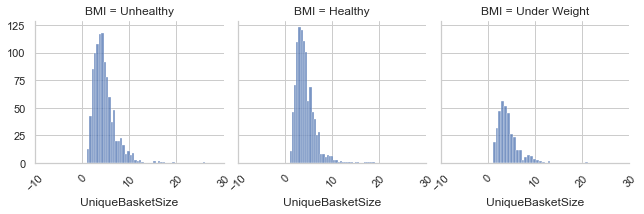

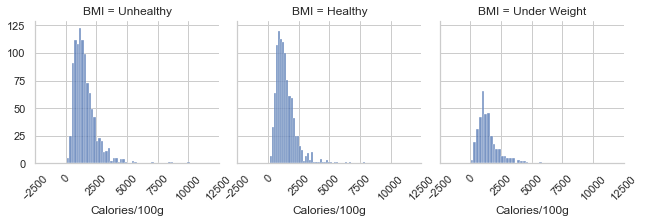

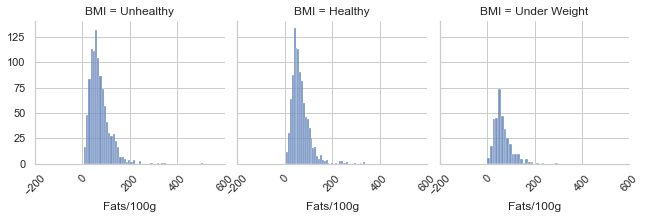

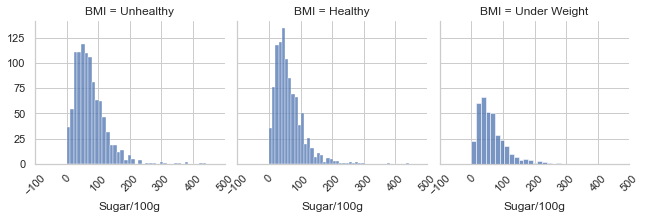

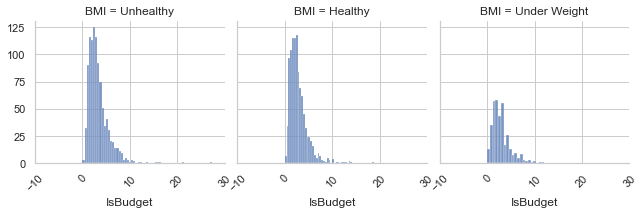

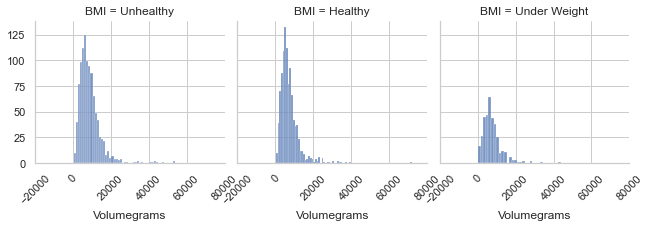

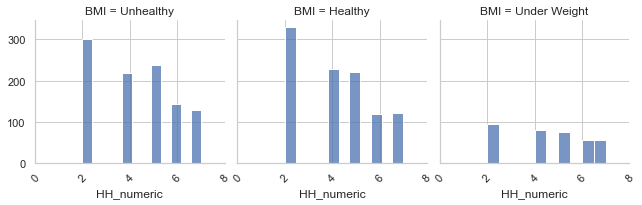

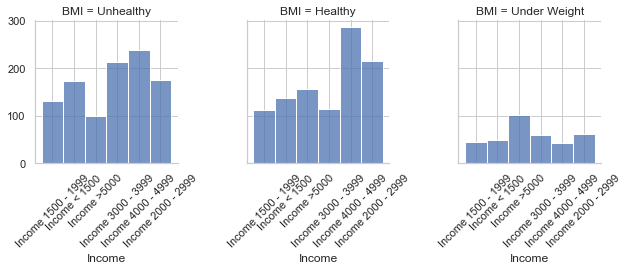

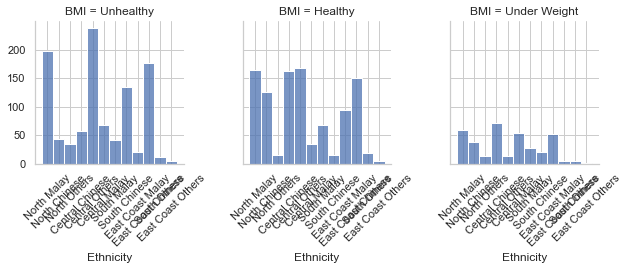

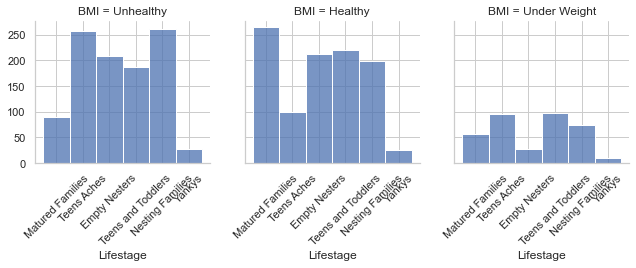

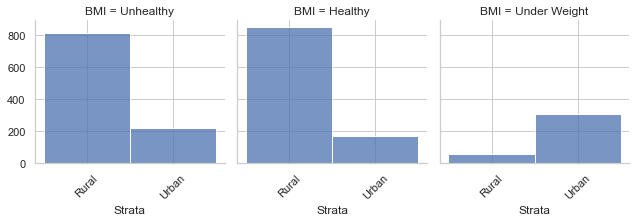

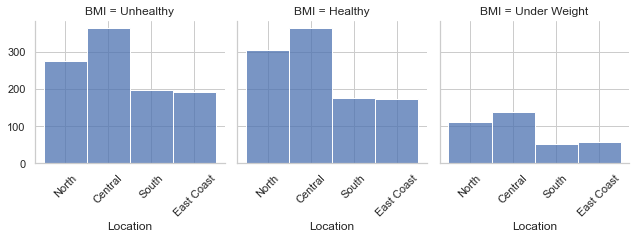

In [469]:
for feature in panel_id_merge.columns:
    sns.set_theme(style="whitegrid")
    if feature == 'BMI':
        continue
    ax = sns.FacetGrid(panel_id_merge, col="BMI")
    ax.map(sns.histplot, feature)
    ax.set_xticklabels(rotation=45)

For ethnicity, there appears to be a trend - a larger proprotion of Malays having a Healthy BMI and a larger proportion of Chinese having an Obese BMI.     
For the remaining features, there does not appear to be any feature to distinguish between different BMI classes as the distribution, mean for each BMI value appears to be the same for all the features,

There is unexpectedly large counts in features with Healthy people. Though this could be attributed to the data having mostly people with Healthy BMI.

#### BMI correlation plot
<p>We shall retain BMI as a factor following the order 'Under Weight','Healthy','Over Weight','Obese' instead of label-encoding it.</p><p>But for the purpose of looking at the correlation between BMI and the other features, we shall label-encode BMI only on a copy of the data that will exclusively be used for visualisation purposes.</p>

<AxesSubplot:>

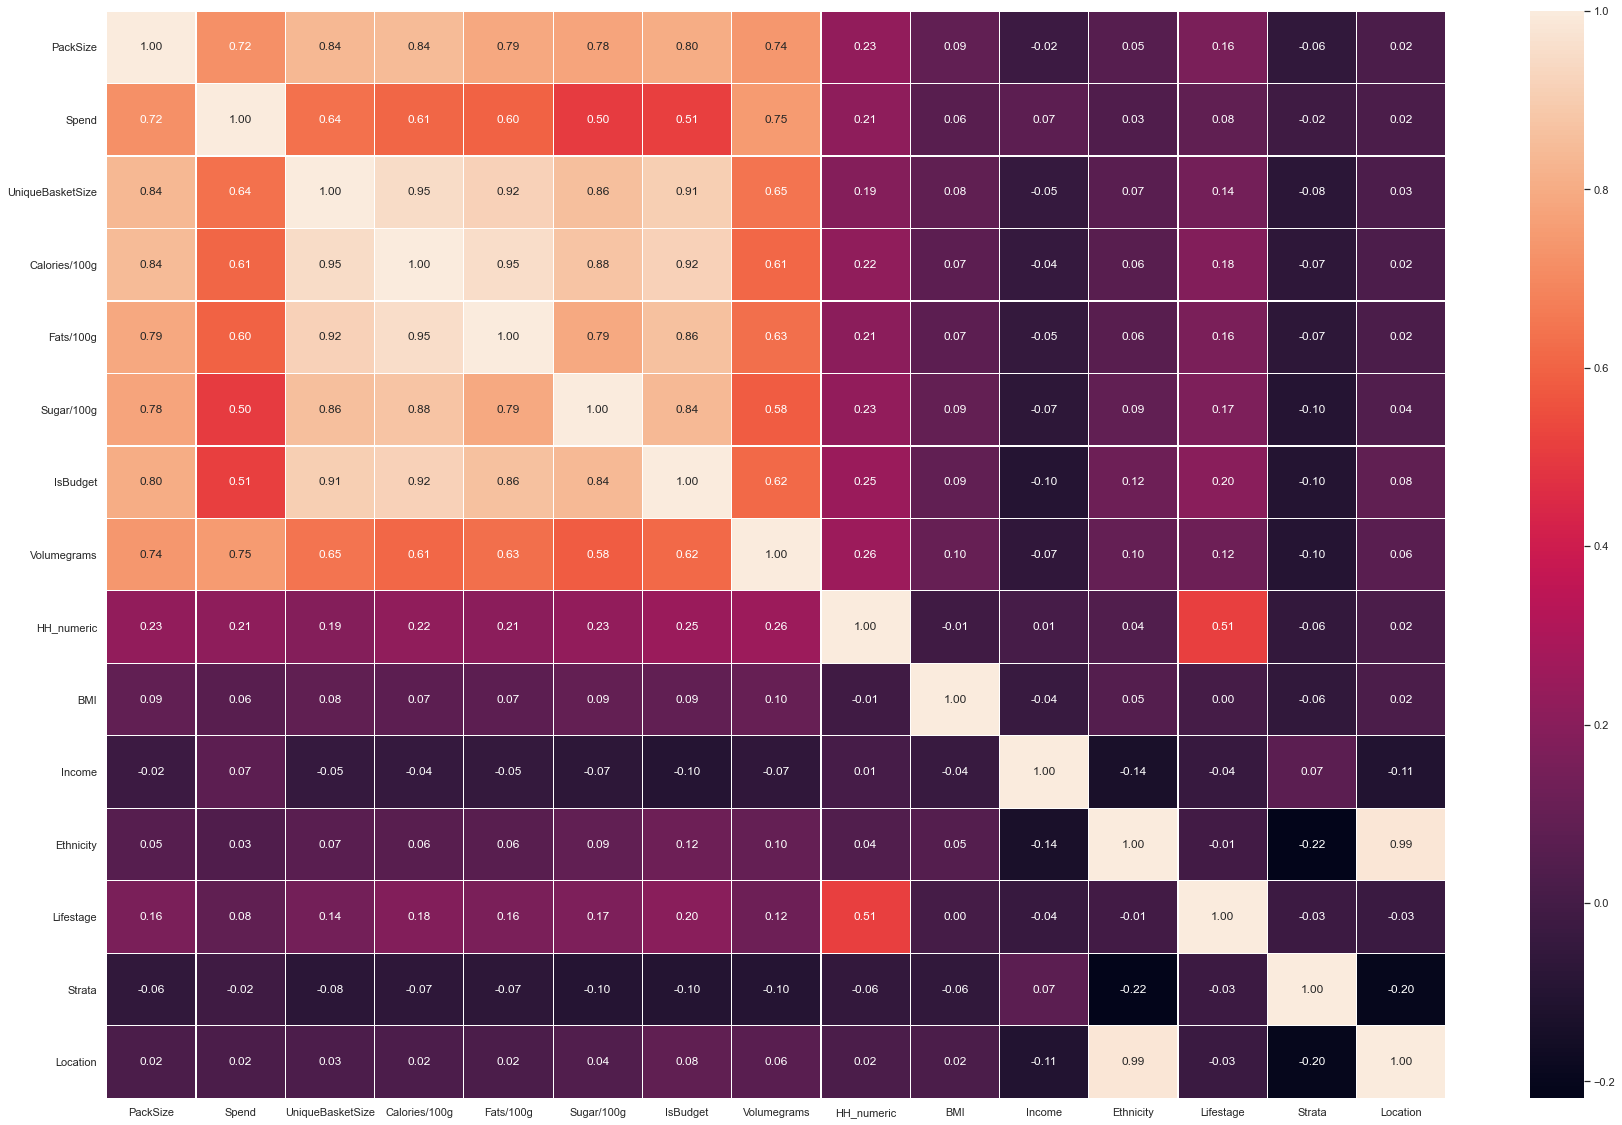

In [470]:
num = panel_id_merged.copy()
# for original BMI categories
#num['BMI'] = num['BMI'].astype(str).apply(lambda x: float(['Under Weight','Healthy','Over Weight','Obese'].index(x)))
# for renamed BMI categories
num['BMI'] = num['BMI'].astype(str).apply(lambda x: float(['Under Weight','Healthy','Unhealthy'].index(x)))
corr = num[num.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

The correlation between BMI and the other features does not look too good &mdash; the highest correlation is 0.09 ('Sugar' and 'Calories') &mdash; but we shall leave it to the tree-based classifiers to determine the importance of each feature.

#### BMI distribution in data

In [471]:
import plotly.offline as pyoff
import plotly.graph_objs as go

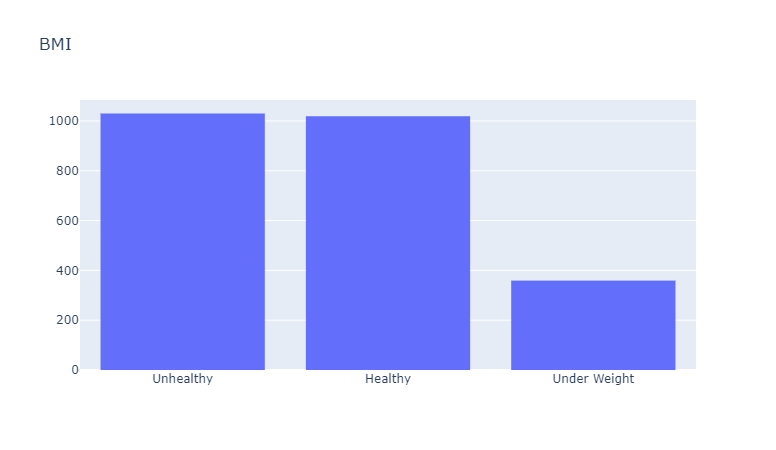

In [472]:
#plot BMI
plot_data = [go.Histogram(x=panel_id_merged['BMI'])]

plot_layout = go.Layout(title='BMI')
fig = go.Figure(data=plot_data,layout=plot_layout)
pyoff.iplot(fig)

#### Final Dataset

In [473]:
panel_id_merged.head()

,PackSize,Spend,UniqueBasketSize,Calories/100g,Fats/100g,Sugar/100g,IsBudget,Volumegrams,HH_numeric,BMI,Income,Ethnicity,Lifestage,Strata,Location
0,8.394737,43.952632,3.342105,1214.157895,58.286842,78.834211,2.315789,13517.894737,2.0,Unhealthy,0,7,0,1,2
1,4.692308,22.838462,3.269231,1087.384615,53.573077,56.473077,2.615385,5206.756154,2.0,Healthy,0,7,3,1,2
2,13.100000,54.376000,8.200000,2805.880000,101.944000,296.204000,7.920000,10319.833600,4.0,Unhealthy,4,7,3,1,2
3,7.340000,36.266000,4.260000,1484.340000,56.210000,52.374000,3.480000,5752.479200,2.0,Unhealthy,0,6,2,1,2
4,7.830189,28.728302,7.132075,2257.452830,140.718868,95.501887,4.169811,4166.030377,2.0,Unhealthy,4,7,0,0,2


# Model 


### Evaluation of Models

- Accuracy
- F1 score
- Hamming loss




### Variables used 
From <code>panel_id_merged</code> dataset(<code>panel_id_merge</code> but with encoding,   )    
For each panelist, per transaction

Predictor:
<code>BMI</code>    
Numeric:    
<code>PackSize</code> : Average pack size   
<code>Spend</code> : Average Spend   
<code>UniqueBasketSize</code> : Average unique basket size   
<code>Calories/100g</code> : Average Calories/100g  
<code>Fats/100g</code>: Average Fats/100g   
<code>Sugar/100g</code>: Average Sugar/100g   
<code>Volumegrams</code>: Average Volumegrams   
<code>HH_numeric</code>  Household Size     
<code>IsBudget</code> :Average Budget category ites(items below average price) purchased
 
Categoricals:   
<code>BMI</code>: Predictor      
<code>Income</code>   Income bracket   Location)      
<code>Lifestage</code>      
<code>Strata</code>   
<code>Location </code>  

In [474]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import graphviz
from sklearn.model_selection import KFold

For Model performance

In [475]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, hamming_loss, mean_squared_error, auc, roc_curve,multilabel_confusion_matrix,classification_report
from sklearn import tree


### Train Test Split for model

In [476]:
# for labelEncoded data
X_train, X_test, y_train, y_test = train_test_split(panel_id_merged.drop('BMI',1), panel_id_merged['BMI'], test_size=0.2, random_state=3101)
# for oneHotEncoded data
#X_train, X_test, y_train, y_test = train_test_split(panel_id_merged.drop('BMI',1), panel_id_merged['BMI'], test_size=0.2, random_state=3101)


In [477]:
y_test.shape

(482,)

Feature importance function 

In [478]:
def feature_imp(model):
    a=dict(zip(X_train.iloc[:,:].columns, model.feature_importances_.round(3)))
    b = dict()
    for key, value in a.items():
        if value > 0 :
            b[key] = value

    return sorted(b.items(), key=lambda x: x[1],reverse=True)

#### features and labels for multilabel confusion matrix and decision tree plots

In [479]:
feature_cols = np.array(X_train.columns).tolist()
# original labels
# labels = ['Under Weight','Healthy','Over Weight','Obese']
# labels for bmi after merge
labels = ['Under Weight','Healthy','Unhealthy']

In [480]:
#underweight,healthy,overweight,obese = multilabel_confusion_matrix(y_test,y_pred,labels=labels)
underweight,healthy,unhealthy= multilabel_confusion_matrix(y_test,y_pred,labels=labels)
cols = ['Predicted Y=0','Predicted Y=1']
ind = ['True Y=0','True Y=1']

## Decision Trees

Two models - one to minimize entropy and one to minimize gini will be used.   


#### Decision-Tree Model 1: Decision Tree built on minimising the gini index

In [481]:
clf1 = tree.DecisionTreeClassifier(random_state=3101,criterion='gini')
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')

for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(clf1)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,16,25,35
True Healthy,36,83,69
True Unhealthy,28,87,103


Accuracy: 0.4191
F1-Scores:
  Under Weight 0.20512820512820512
  Healthy      0.43342036553524804
  Unhealthy    0.4847058823529412


[('Spend', 0.124),
 ('Fats/100g', 0.115),
 ('Volumegrams', 0.108),
 ('IsBudget', 0.105),
 ('Sugar/100g', 0.102),
 ('Calories/100g', 0.099),
 ('PackSize', 0.095),
 ('UniqueBasketSize', 0.068),
 ('Ethnicity', 0.049),
 ('Income', 0.041),
 ('Lifestage', 0.041),
 ('HH_numeric', 0.034),
 ('Location', 0.013),
 ('Strata', 0.005)]

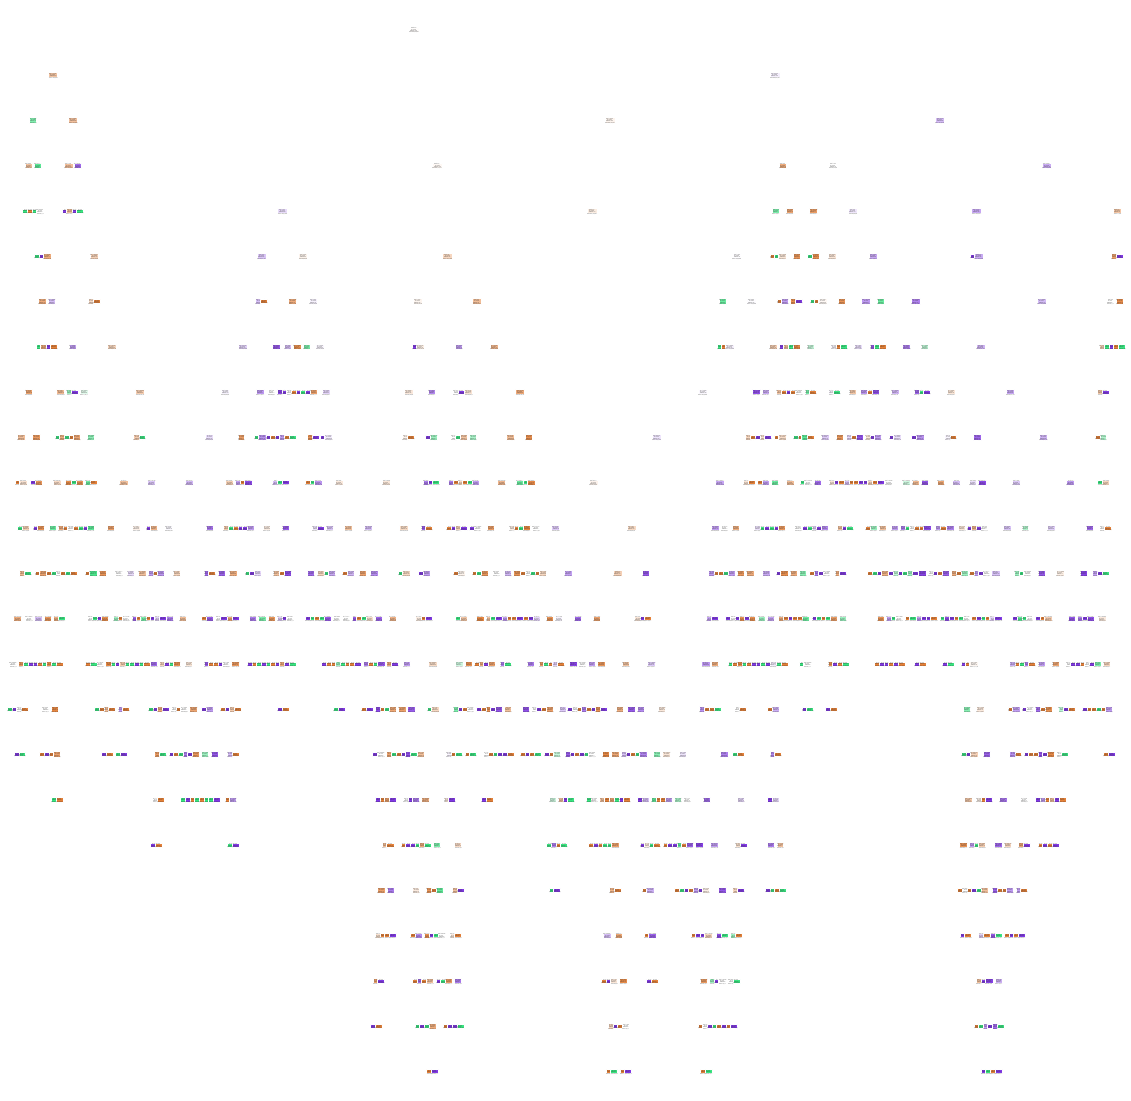

In [482]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf1,filled=True)  
plt.savefig('decisiontree.eps',format='eps',bbox_inches = "tight")

In [483]:
dotfile = open("tree4.dot", 'w')
tree.export_graphviz(clf1,out_file = dotfile,
                     feature_names=feature_cols,
                     class_names = [str(i) for i in clf1.classes_],
                     proportion=False) 
dotfile.close()

#### Decision-Tree Model 2: Decision Tree built on minimising entropy

In [484]:
clf2 = tree.DecisionTreeClassifier(random_state=3101,criterion='entropy')
clf2.fit(X_train,y_train)
y_pred = clf2.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(clf2)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,15,31,30
True Healthy,35,81,72
True Unhealthy,28,99,91


Accuracy: 0.388
F1-Scores:
  Under Weight 0.19480519480519481
  Healthy      0.406015037593985
  Unhealthy    0.44282238442822386


[('Volumegrams', 0.118),
 ('Sugar/100g', 0.116),
 ('IsBudget', 0.114),
 ('Calories/100g', 0.107),
 ('PackSize', 0.103),
 ('UniqueBasketSize', 0.087),
 ('Spend', 0.079),
 ('Fats/100g', 0.077),
 ('Ethnicity', 0.052),
 ('Income', 0.05),
 ('Lifestage', 0.047),
 ('Location', 0.021),
 ('HH_numeric', 0.019),
 ('Strata', 0.01)]

In [485]:
dotfile = open("tree3.dot", 'w')
tree.export_graphviz(clf2,out_file = dotfile,
                     feature_names=feature_cols,
                     class_names = [str(i) for i in clf2.classes_],
                     proportion=False) 
dotfile.close()

### Pruning
Models 1 and 2 are not pruned, which result in overfitting as well as trees that are too deep and complicated. Hence, we shall iterate over a range of hyper-parameters to select the best models.

#### Pruning by <code>max_depth</code>

In [486]:
import numpy as np

Best max_depth for gini: 2
Best max_depth for entropy: 2


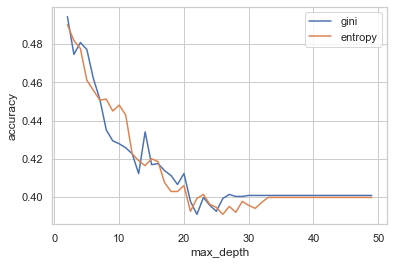

In [487]:


max_depth = []
acc_gini = []
acc_entropy = []
kf = KFold(n_splits=10,random_state=3101,shuffle=True)
gini_scores = []
entropy_scores = []
for i in range(2,50):
    for train_index, val_index in kf.split(X_train.values):
        X_t, X_v = X_train.values[train_index], X_train.values[val_index]
        y_t, y_v = y_train.values[train_index], y_train.values[val_index]
        ####
        dtree = DecisionTreeClassifier(random_state=3101,criterion='gini',max_depth=i)
        dtree.fit(X_t, y_t)
        pred = dtree.predict(X_v)
        gini_scores.append(accuracy_score(y_v,pred))
        ###
        dtree = DecisionTreeClassifier(random_state=3101,criterion='entropy',max_depth=i)
        dtree.fit(X_t,y_t)
        pred = dtree.predict(X_v)
        entropy_scores.append(accuracy_score(y_v,pred))
    acc_gini.append(np.mean(gini_scores))
    gini_scores.clear()
    acc_entropy.append(np.mean(entropy_scores))
    entropy_scores.clear()
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

#### Pruning by <code>max_leaf_nodes</code>

Best max_leaf_nodes  for gini: 3
Best max_leaf_nodes  for entropy: 3


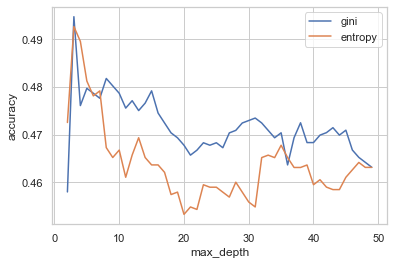

In [488]:
max_depth = []
acc_gini = []
acc_entropy = []
kf = KFold(n_splits=10,random_state=3101,shuffle=True)
gini_scores = []
entropy_scores = []
for i in range(2,50):
    for train_index, val_index in kf.split(X_train.values):
        X_t, X_v = X_train.values[train_index], X_train.values[val_index]
        y_t, y_v = y_train.values[train_index], y_train.values[val_index]
        ####
        dtree = DecisionTreeClassifier(random_state=3101,criterion='gini',max_leaf_nodes =i)
        dtree.fit(X_t, y_t)
        pred = dtree.predict(X_v)
        gini_scores.append(accuracy_score(y_v,pred))
        ###
        dtree = DecisionTreeClassifier(random_state=3101,criterion='entropy',max_leaf_nodes =i)
        dtree.fit(X_t,y_t)
        pred = dtree.predict(X_v)
        entropy_scores.append(accuracy_score(y_v,pred))
    acc_gini.append(np.mean(gini_scores))
    gini_scores.clear()
    acc_entropy.append(np.mean(entropy_scores))
    entropy_scores.clear()
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print("Best max_leaf_nodes  for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
print("Best max_leaf_nodes  for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

Thus, we observe that the hyper-parameters <code>max_depth=3</code> and <code>max_leaf_nodes=4</code> are likely to give us the models with best accuracy, for both criteria <code>'gini'</code> and <code>'entropy'</code>.

#### Decision-Tree Model 3: Decision Tree with criterion='gini', max_leaf_nodes=4, max_depth=3

In [489]:
clf3 = tree.DecisionTreeClassifier(random_state=3101,criterion='gini',max_leaf_nodes=4,max_depth=3)
clf3.fit(X_train,y_train)
y_pred = clf3.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):

    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(clf3)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,64,12
True Healthy,0,148,40
True Unhealthy,0,147,71


Accuracy: 0.4544
Hamming loss: 0.5456
F1-Scores:
  Under Weight 0.0
  Healthy      0.5411334552102377
  Unhealthy    0.4164222873900293


[('Ethnicity', 0.557), ('Volumegrams', 0.334), ('Sugar/100g', 0.11)]

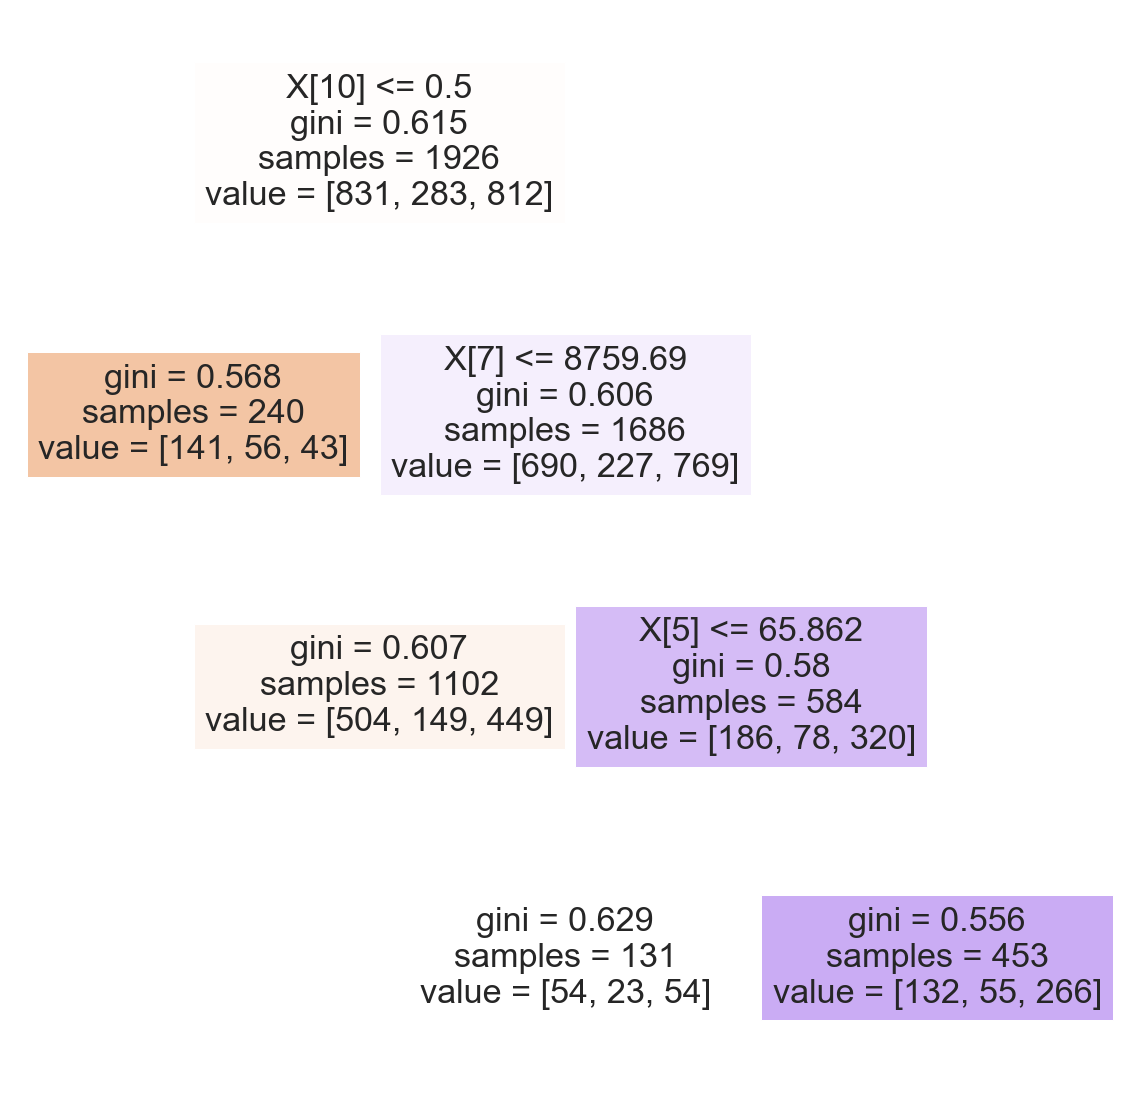

In [490]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf3,filled=True)  
plt.savefig('decisiontree.eps',format='eps',bbox_inches = "tight")

In [491]:
clf3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10964377, 0.        , 0.33381958, 0.        , 0.        ,
       0.55653665, 0.        , 0.        , 0.        ])

In [492]:
dotfile = open("tree.dot", 'w')
tree.export_graphviz(clf3,out_file = dotfile,
                     feature_names=feature_cols,
                     class_names = [str(i) for i in clf3.classes_],
                     proportion=False) 
dotfile.close()

Confusion matrix report for each class vs other classes,   
Accuracy
Specificity: true positives out of all predicted positives 
and Sentivitiy: true negatives out of all predicted negative

<b>Underweight Confusion Matrix</b>    
From the specificity of 1, this model is not useful for differentiating panelists with an underweight BMI since the model would classify everyone as having an underweight BMI against not having an underweight BMI

In [493]:
tn,fp,fn,tp = underweight.ravel()
underweight = pd.DataFrame(underweight)
underweight.columns = cols
underweight.index = ind
display(underweight)
accuracy = (tp+tn)/(tp+fp+fn+tn)
specificity = tn/(fp+tn)
sensitivity = tp/(tp+fn)
print("Accuracy:",round(accuracy,4))
print("Specificity:",round(specificity,4))
print("Sensitivity:",round(sensitivity,4))

,Predicted Y=0,Predicted Y=1
True Y=0,392,14
True Y=1,71,5


Accuracy: 0.8237
Specificity: 0.9655
Sensitivity: 0.0658


<b> Healthy Confusion Matrix </b>     
to find out why the model would have a high false positive rate - categories of the false positive panelists

In [494]:
tn,fp,fn,tp = healthy.ravel()
healthy = pd.DataFrame(healthy)
healthy.columns = cols
healthy.index = ind
display(healthy)
accuracy = (tp+tn)/(tp+fp+fn+tn)
specificity = tn/(fp+tn)
sensitivity = tp/(tp+fn)
print("Accuracy:",round(accuracy,4))
print("Specificity:",round(specificity,4))
print("Sensitivity:",round(sensitivity,4))

,Predicted Y=0,Predicted Y=1
True Y=0,109,185
True Y=1,63,125


Accuracy: 0.4855
Specificity: 0.3707
Sensitivity: 0.6649


<b> Unhealthy Confusion Matrix</b>

In [495]:
tn,fp,fn,tp = unhealthy.ravel()
unhealthy = pd.DataFrame(unhealthy)
unhealthy.columns = cols
unhealthy.index = ind
display(unhealthy)
accuracy = (tp+tn)/(tp+fp+fn+tn)
specificity = tn/(fp+tn)
sensitivity = tp/(tp+fn)
print("Accuracy:",round(accuracy,4))
print("Specificity:",round(specificity,4))
print("Sensitivity:",round(sensitivity,4))

,Predicted Y=0,Predicted Y=1
True Y=0,191,73
True Y=1,138,80


Accuracy: 0.5622
Specificity: 0.7235
Sensitivity: 0.367


In [496]:
# tn,fp,fn,tp = overweight.ravel()
# overweight = pd.DataFrame(overweight)
# overweight.columns = cols
# overweight.index = ind
# display(overweight)
# accuracy = (tp+tn)/(tp+fp+fn+tn)
# specificity = tn/(fp+tn)
# sensitivity = tp/(tp+fn)
# print("Accuracy:",round(accuracy,4))
# print("Specificity:",round(specificity,4))
# print("Sensitivity:",round(sensitivity,4))

In [497]:
# tn,fp,fn,tp = obese.ravel()
# obese = pd.DataFrame(obese)
# obese.columns = cols
# obese.index = ind
# display(obese)
# accuracy = (tp+tn)/(tp+fp+fn+tn)
# specificity = tn/(fp+tn)
# sensitivity = tp/(tp+fn)
# print("Accuracy:",round(accuracy,4))
# print("Specificity:",round(specificity,4))
# print("Sensitivity:",round(sensitivity,4))

#### Decision-Tree Model 4: Decision Tree with criterion='entropy', max_leaf_nodes=4, max_depth=3

In [498]:
clf4 = tree.DecisionTreeClassifier(random_state=3101,criterion='entropy',max_leaf_nodes=4,max_depth=3)
clf4.fit(X_train,y_train)
y_pred = clf4.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(clf4)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,55,21
True Healthy,0,132,56
True Unhealthy,0,131,87


Hamming loss: 0.5456
F1-Scores:
  Under Weight 0.0
  Healthy      0.5217391304347826
  Unhealthy    0.4554973821989529


[('Ethnicity', 0.605), ('Volumegrams', 0.286), ('PackSize', 0.109)]

In [499]:
clf4 = tree.DecisionTreeClassifier(random_state=3101,criterion='entropy',max_leaf_nodes=4,max_depth=3)
clf4.fit(X_train,y_train)
y_pred = clf4.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(clf4)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,55,21
True Healthy,0,132,56
True Unhealthy,0,131,87


Accuracy: 0.4544
F1-Scores:
  Under Weight 0.0
  Healthy      0.5217391304347826
  Unhealthy    0.4554973821989529


[('Ethnicity', 0.605), ('Volumegrams', 0.286), ('PackSize', 0.109)]

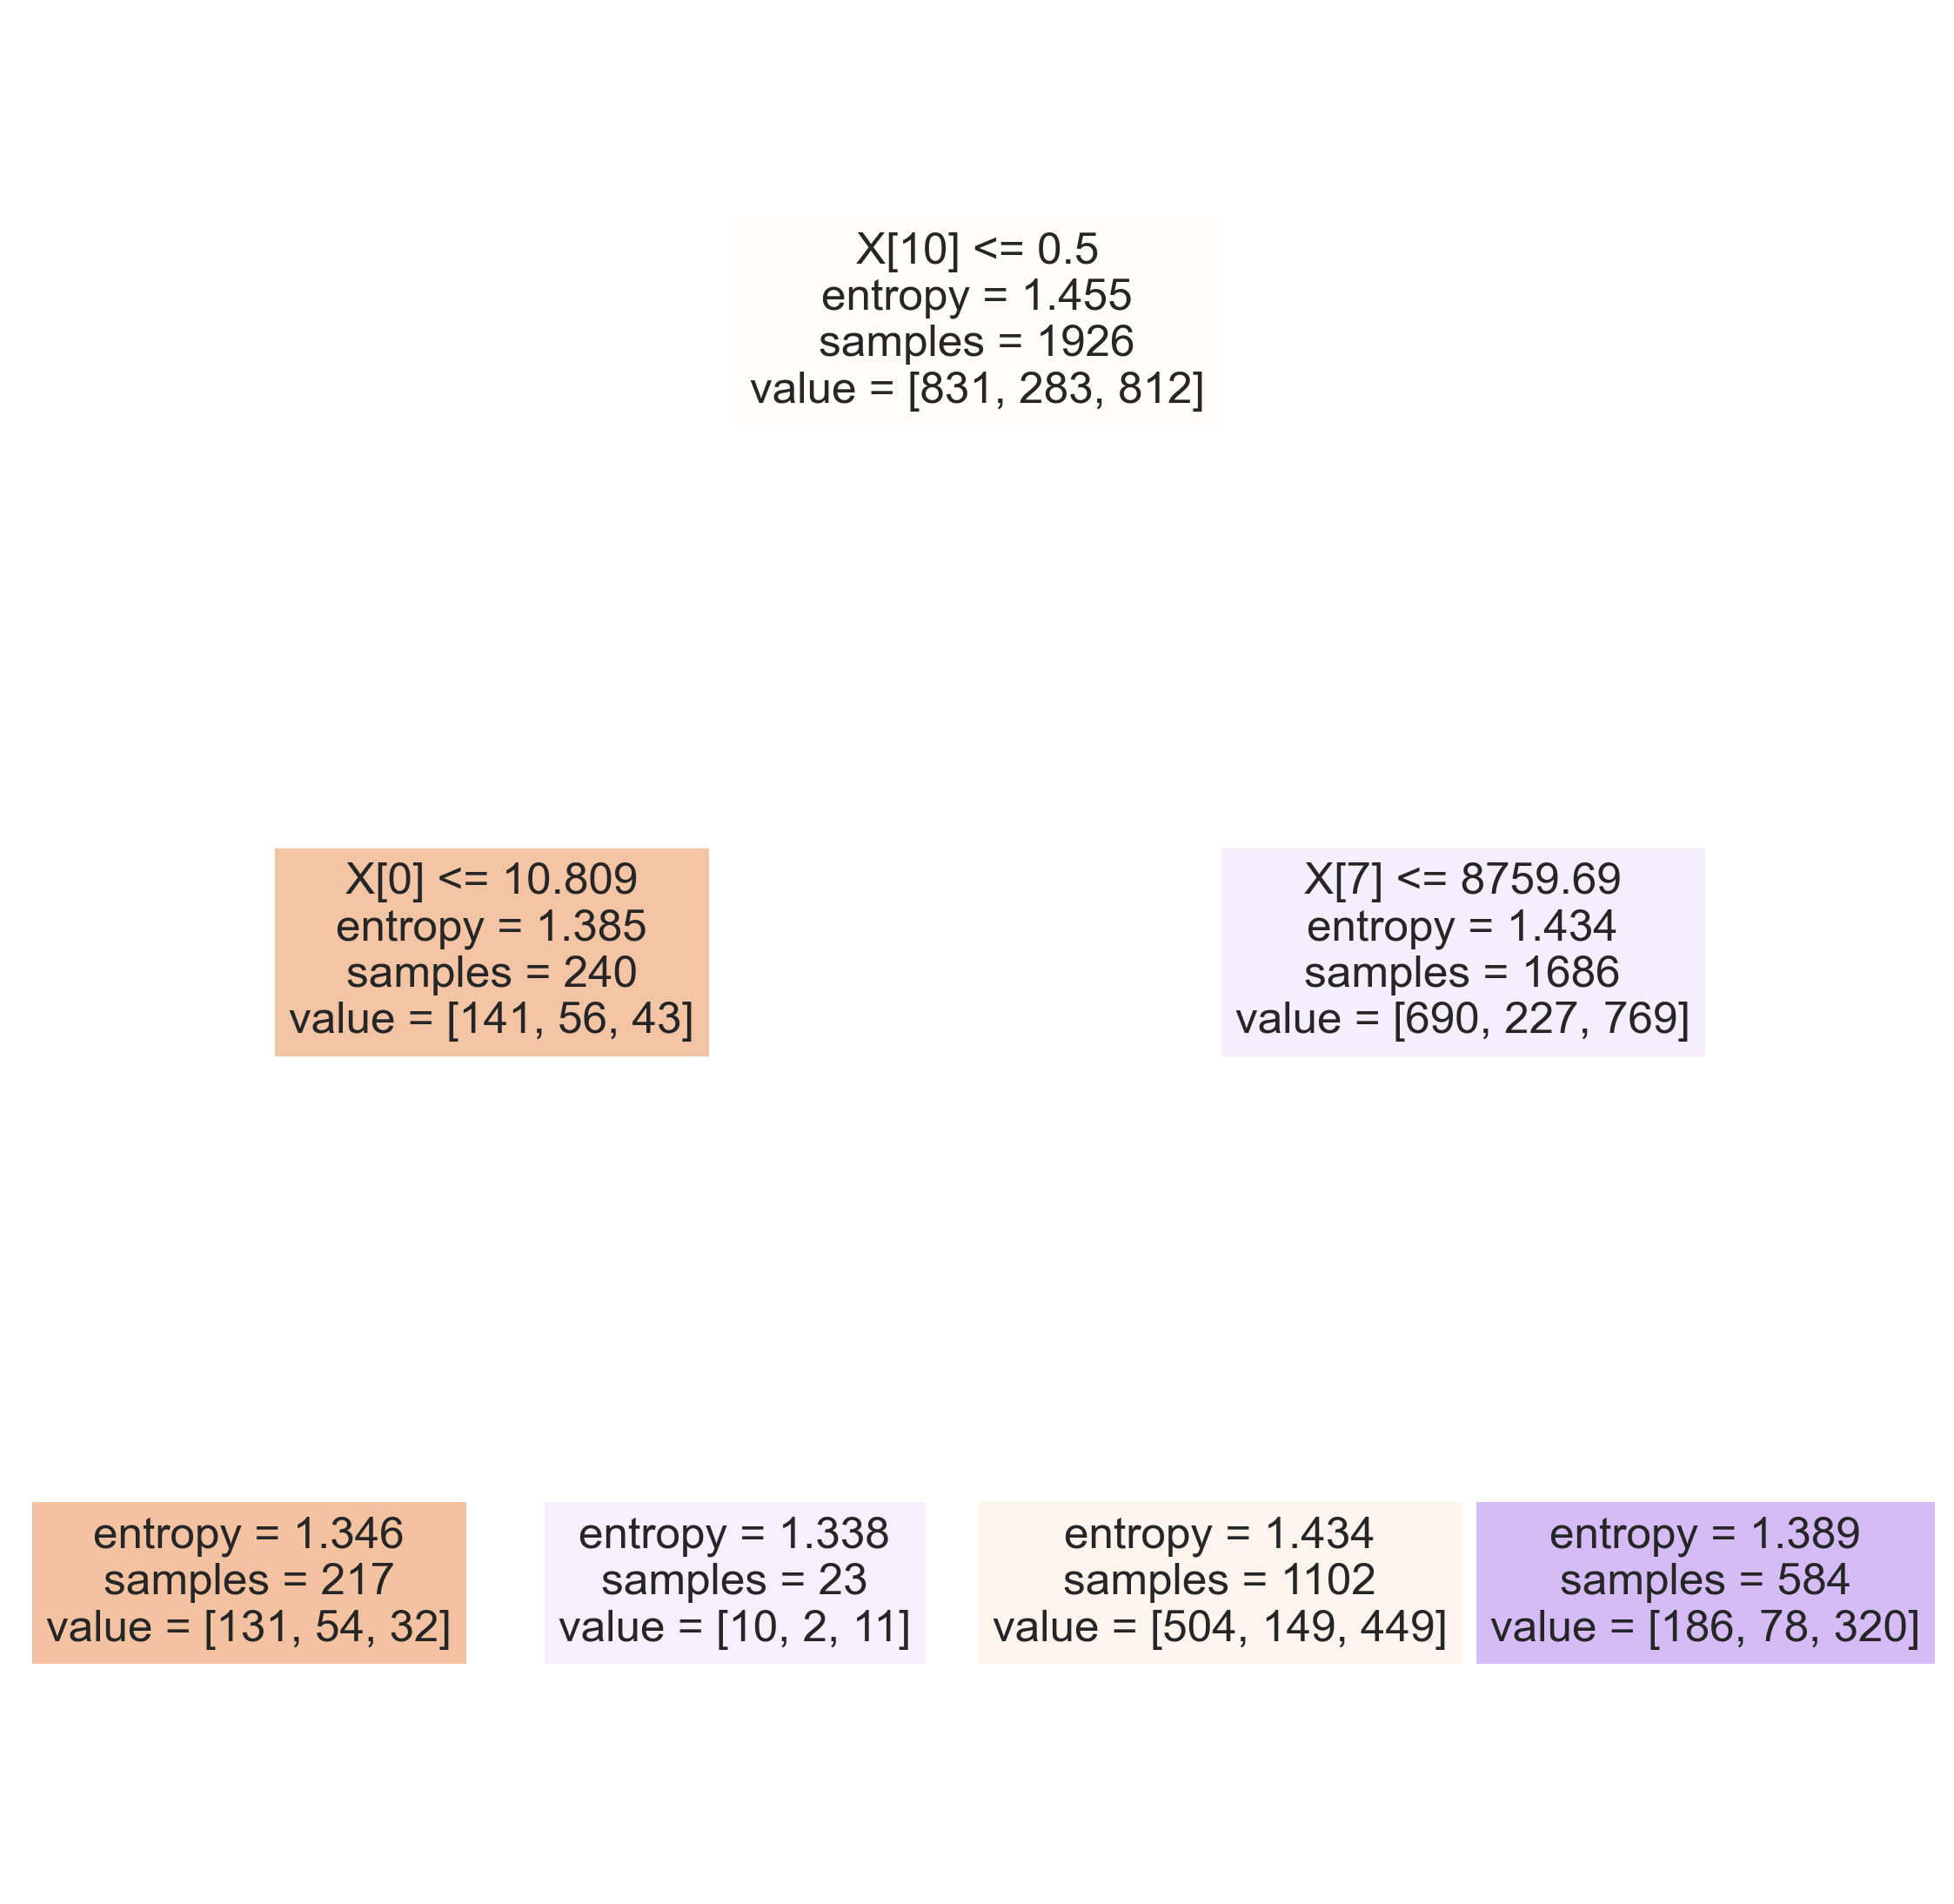

In [500]:
plt.figure(figsize=(40,40))
tree.plot_tree(clf4,filled=True)  
plt.savefig('decisiontree.eps',format='eps',bbox_inches = "tight")

In [501]:
dotfile = open("tree2.dot", 'w')
tree.export_graphviz(clf4,out_file = dotfile,
                     feature_names=feature_cols,
                     class_names = [str(i) for i in clf4.classes_],
                     proportion=False) 
dotfile.close()

<b>Decision Tree 4 Confusion matrix

In [502]:
#underweight,healthy,overweight,obese = multilabel_confusion_matrix(y_test,y_pred,labels=labels)
underweight,healthy,unhealthy= multilabel_confusion_matrix(y_test,y_pred,labels=labels)
cols = ['Predicted Y=0','Predicted Y=1']
ind = ['True Y=0','True Y=1']

<b> Underweight confusion matrix

In [503]:
tn,fp,fn,tp = underweight.ravel()
underweight = pd.DataFrame(underweight)
underweight.columns = cols
underweight.index = ind
display(underweight)
accuracy = (tp+tn)/(tp+fp+fn+tn)
specificity = tn/(fp+tn)
sensitivity = tp/(tp+fn)
print("Accuracy:",round(accuracy,4))
print("Specificity:",round(specificity,4))
print("Sensitivity:",round(sensitivity,4))

,Predicted Y=0,Predicted Y=1
True Y=0,406,0
True Y=1,76,0


Accuracy: 0.8423
Specificity: 1.0
Sensitivity: 0.0


<b> Healthy confusion matrix

In [504]:
tn,fp,fn,tp = healthy.ravel()
healthy = pd.DataFrame(healthy)
healthy.columns = cols
healthy.index = ind
display(healthy)
accuracy = (tp+tn)/(tp+fp+fn+tn)
specificity = tn/(fp+tn)
sensitivity = tp/(tp+fn)
print("Accuracy:",round(accuracy,4))
print("Specificity:",round(specificity,4))
print("Sensitivity:",round(sensitivity,4))

,Predicted Y=0,Predicted Y=1
True Y=0,108,186
True Y=1,56,132


Accuracy: 0.4979
Specificity: 0.3673
Sensitivity: 0.7021


<b> Unhealthy confusion matrix

In [505]:
tn,fp,fn,tp = unhealthy.ravel()
unhealthy = pd.DataFrame(unhealthy)
unhealthy.columns = cols
unhealthy.index = ind
display(unhealthy)
accuracy = (tp+tn)/(tp+fp+fn+tn)
specificity = tn/(fp+tn)
sensitivity = tp/(tp+fn)
print("Accuracy:",round(accuracy,4))
print("Specificity:",round(specificity,4))
print("Sensitivity:",round(sensitivity,4))

,Predicted Y=0,Predicted Y=1
True Y=0,187,77
True Y=1,131,87


Accuracy: 0.5685
Specificity: 0.7083
Sensitivity: 0.3991


Gridsearch Cv for finding best parameters for decision tree classifier

In [506]:
# param_grid = {'criterion':['gini','entropy'],
#               'max_depth':list(range(2,20)),
#               'max_leaf_nodes':list(range(2,25))}
# gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=3101),
#                   param_grid=param_grid,
#                   scoring='f1_weighted',
#                   cv=10)
# gs.fit(X_train,y_train)

In [507]:
#gs.best_estimator_

The hyper-parameters selected through GridSearchCV for the DecisionTreeClassifier are:
* criterion:      gini
* max_depth:      5
* max_leaf_nodes: 19

In [508]:
# best_dtc = gs.best_estimator_ 
best_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=19,random_state=3101)
best_dtc.fit(X_train,y_train)
y_pred = best_dtc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(best_dtc)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,5,50,21
True Healthy,11,125,52
True Unhealthy,3,135,80


Hamming loss: 0.5643
F1-Scores:
  Under Weight 0.10526315789473684
  Healthy      0.5020080321285141
  Unhealthy    0.431266846361186


[('Ethnicity', 0.251),
 ('Volumegrams', 0.242),
 ('PackSize', 0.154),
 ('Sugar/100g', 0.108),
 ('UniqueBasketSize', 0.085),
 ('Fats/100g', 0.063),
 ('Lifestage', 0.053),
 ('IsBudget', 0.044)]

In [509]:
#best_dtc = gs.best_estimator_
y_pred = best_dtc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(best_dtc)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,5,50,21
True Healthy,11,125,52
True Unhealthy,3,135,80


Accuracy: 0.4357
F1-Scores:
  Under Weight 0.10526315789473684
  Healthy      0.5020080321285141
  Unhealthy    0.431266846361186


[('Ethnicity', 0.251),
 ('Volumegrams', 0.242),
 ('PackSize', 0.154),
 ('Sugar/100g', 0.108),
 ('UniqueBasketSize', 0.085),
 ('Fats/100g', 0.063),
 ('Lifestage', 0.053),
 ('IsBudget', 0.044)]

The normalized Gini importance of each feature shows that the top 5 features in predicting BMI are:
1. Ethnicity
2. Volumegrams
3. UniqueBasketSize
4. Fats
5. Spend

In [510]:
all_healthy = np.array(['Healthy']*482)
print('Accuracy:',round(accuracy_score(y_test, all_healthy),4))
print('Hamming_loss:',round(hamming_loss(y_test, all_healthy),4))

Accuracy: 0.39
Hamming_loss: 0.61


The decision-tree models in increasing order of hamming loss are:
1. random_state=3101, max_depth=3, max_leaf_nodes=4 (0.6058) - same for 'gini' and 'entropy'
2. predict all healthy (0.6100)
3. criterion='gini', random_state=3101, max_depth=5, max_leaf_nodes=19 (0.6162)
4. criterion='entropy', random_state=3101 (0.6639)
5. criterion='gini', random_state=3101 (0.6971)

The decision-tree models in decreasing order of accuracy are:
1. random_state=3101, max_depth=3, max_leaf_nodes=4 (0.3942) - same for 'gini' and 'entropy'
2. predict all healthy (0.3900)
3. criterion='gini', random_state=3101, max_depth=5, max_leaf_nodes=19 (0.3838)
4. criterion='entropy', random_state=3101 (0.3361)
5. criterion='gini', random_state=3101 (0.3029)

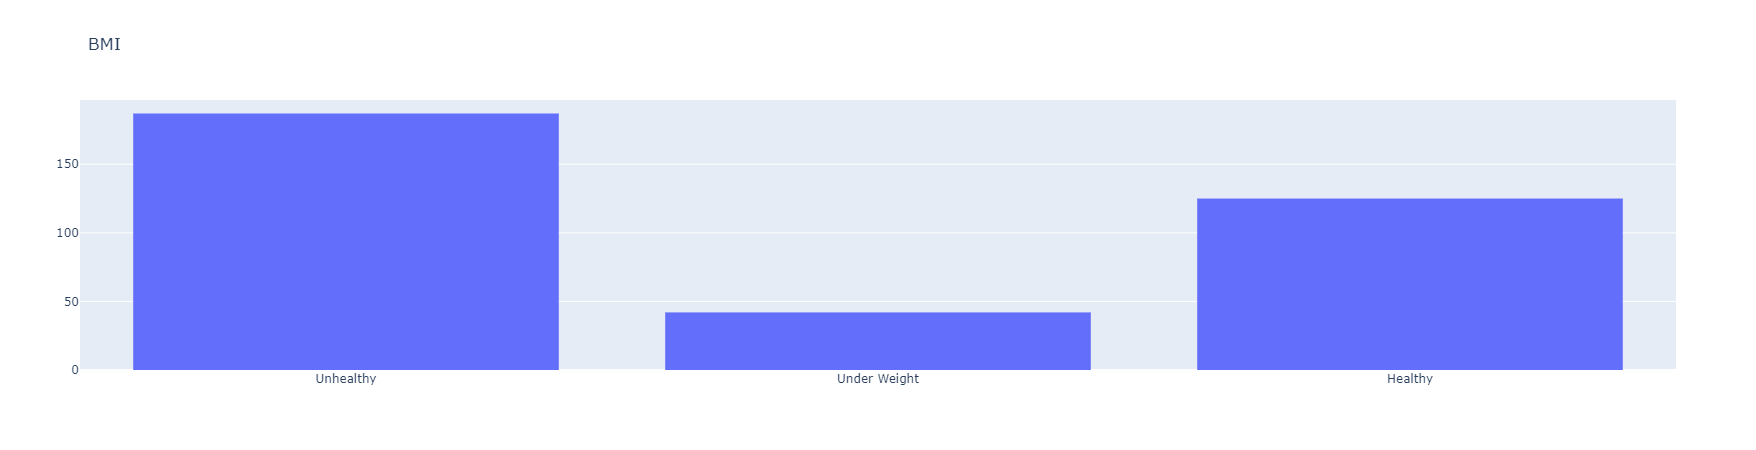

In [511]:
# malay against BMI
plot_data = [go.Histogram(x=pd.DataFrame(y_train[X_train['Ethnicity']==1])['BMI'])]

plot_layout = go.Layout(title='BMI')
fig = go.Figure(data=plot_data,layout=plot_layout)
pyoff.iplot(fig)

### Evaluation of DecisionTrees



In [512]:
dotfile = open("tree.dot", 'w')
tree.export_graphviz(best_dtc,out_file = dotfile,
                     feature_names=X_train.columns,
                     class_names = [str(i) for i in best_dtc.classes_],
                     proportion=False) 
dotfile.close()

# Easiest way to view the dotfile:
# https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn
# 1) exporting it with export_graphviz 
# 2) Open the .dot file in a text editor
# 3) Copy the piece of code and paste it @ webgraphviz.com

In [513]:
dotfile = open("tree.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X_train.columns)
dotfile.close()

In [514]:
feature_imp(best_dtc)

[('Ethnicity', 0.251),
 ('Volumegrams', 0.242),
 ('PackSize', 0.154),
 ('Sugar/100g', 0.108),
 ('UniqueBasketSize', 0.085),
 ('Fats/100g', 0.063),
 ('Lifestage', 0.053),
 ('IsBudget', 0.044)]

In [515]:
cols = ['Predicted Y=0','Predicted Y=1']
ind = ['True Y=0','True Y=1']

## RandomForest
It appears that the decision tree model has been generalizing on the majority of the 2 BMI classes, 'Healthy' and 'Unhealthy' BMI panelists. We will use RandomForest to check if model accuracy can be improved over Decision trees.

Max Depth plots

#### Max Depth plots

Best max_depth for gini: 8
Best max_depth for entropy: 10


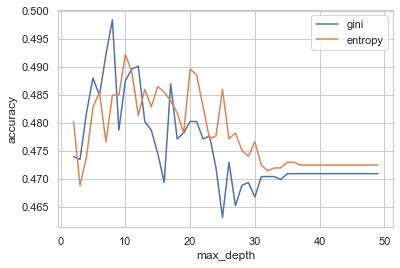

In [516]:
max_depth = []
acc_gini = []
acc_entropy = []
kf = KFold(n_splits=10,random_state=3101,shuffle=True)
gini_scores = []
entropy_scores = []
for i in range(2,50):
    for train_index, val_index in kf.split(X_train.values):
        X_t, X_v = X_train.values[train_index], X_train.values[val_index]
        y_t, y_v = y_train.values[train_index], y_train.values[val_index]
        ####
        dtree = RandomForestClassifier(random_state=3101,criterion='gini',max_depth=i)
        dtree.fit(X_t, y_t)
        pred = dtree.predict(X_v)
        gini_scores.append(accuracy_score(y_v,pred))
        ###
        dtree = RandomForestClassifier(random_state=3101,criterion='entropy',max_depth=i)
        dtree.fit(X_t,y_t)
        pred = dtree.predict(X_v)
        entropy_scores.append(accuracy_score(y_v,pred))
    acc_gini.append(np.mean(gini_scores))
    gini_scores.clear()
    acc_entropy.append(np.mean(entropy_scores))
    entropy_scores.clear()
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print("Best max_depth for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
print("Best max_depth for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

#### Max Leaf Node plots

Best max_leaf_nodes for gini: 36
Best max_leaf_nodes for entropy: 49


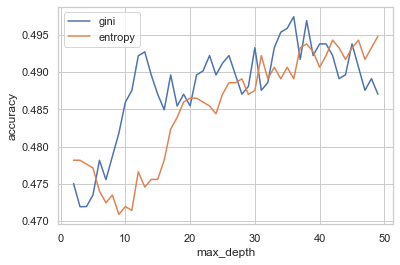

In [518]:
max_depth = []
acc_gini = []
acc_entropy = []
kf = KFold(n_splits=10,random_state=3101,shuffle=True)
gini_scores = []
entropy_scores = []
for i in range(2,50):
    for train_index, val_index in kf.split(X_train.values):
        X_t, X_v = X_train.values[train_index], X_train.values[val_index]
        y_t, y_v = y_train.values[train_index], y_train.values[val_index]
        ####
        dtree = RandomForestClassifier(random_state=3101,criterion='gini',max_leaf_nodes=i)
        dtree.fit(X_t, y_t)
        pred = dtree.predict(X_v)
        gini_scores.append(accuracy_score(y_v,pred))
        ###
        dtree = RandomForestClassifier(random_state=3101,criterion='entropy',max_leaf_nodes=i)
        dtree.fit(X_t,y_t)
        pred = dtree.predict(X_v)
        entropy_scores.append(accuracy_score(y_v,pred))
    acc_gini.append(np.mean(gini_scores))
    gini_scores.clear()
    acc_entropy.append(np.mean(entropy_scores))
    entropy_scores.clear()
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
    'acc_entropy':pd.Series(acc_entropy),
    'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
print("Best max_leaf_nodes for gini:", d.sort_values('acc_gini',ascending=False).iloc[0,2])
print("Best max_leaf_nodes for entropy:", d.sort_values('acc_entropy',ascending=False).iloc[0,2])

#### Other Random Forest models

### Random Forest Model 1  - Fit with criterion = gini,  max_depth = 6

In [519]:
rfc1 = RandomForestClassifier(random_state=3101,criterion='gini',max_depth=6)
rfc1.fit(X_train,y_train)
y_pred = rfc1.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:", round(accuracy_score(y_test,y_pred),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[1]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(rfc1)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,39,37
True Healthy,0,104,84
True Unhealthy,0,98,120


Accuracy: 0.4647
Hamming loss: 0.5353
F1-Scores:
  Under Weight 0.0
  Healthy      0.48484848484848486
  Unhealthy    0.5228758169934641


[('Volumegrams', 0.131),
 ('Ethnicity', 0.111),
 ('IsBudget', 0.104),
 ('Sugar/100g', 0.099),
 ('PackSize', 0.093),
 ('Spend', 0.091),
 ('UniqueBasketSize', 0.089),
 ('Calories/100g', 0.088),
 ('Fats/100g', 0.08),
 ('Lifestage', 0.029),
 ('Income', 0.028),
 ('HH_numeric', 0.024),
 ('Location', 0.024),
 ('Strata', 0.01)]

### Random Forest Model 2 - Fit with criterion = 'gini', max_leaf_nodes = 10

In [520]:
rfc2 = RandomForestClassifier(random_state=3101,criterion='gini',max_leaf_nodes=10)
rfc2.fit(X_train,y_train)
y_pred = rfc2.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:", round(accuracy_score(y_test,y_pred),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(rfc2)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,39,37
True Healthy,0,100,88
True Unhealthy,0,97,121


Accuracy: 0.4585
Hamming loss: 0.5415
F1-Scores:
  Under Weight 0.0
  Healthy      0.4716981132075472
  Unhealthy    0.521551724137931


[('Ethnicity', 0.18),
 ('Volumegrams', 0.169),
 ('IsBudget', 0.114),
 ('Sugar/100g', 0.113),
 ('PackSize', 0.087),
 ('UniqueBasketSize', 0.077),
 ('Spend', 0.074),
 ('Fats/100g', 0.07),
 ('Calories/100g', 0.058),
 ('Income', 0.017),
 ('Location', 0.017),
 ('Lifestage', 0.011),
 ('HH_numeric', 0.009),
 ('Strata', 0.006)]

### Random Forest Model 3 - Fit with criterion = 'Entropy' max_depth=13

In [521]:
rfc3 = RandomForestClassifier(random_state=3101,criterion='entropy',max_depth=13)
rfc3.fit(X_train,y_train)
y_pred = rfc3.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:", round(accuracy_score(y_test,y_pred),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(rfc3)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,1,36,39
True Healthy,2,98,88
True Unhealthy,1,99,118


Accuracy: 0.4502
Hamming loss: 0.5498
F1-Scores:
  Under Weight 0.025
  Healthy      0.46555819477434685
  Unhealthy    0.5097192224622029


[('Volumegrams', 0.108),
 ('Spend', 0.1),
 ('PackSize', 0.099),
 ('Fats/100g', 0.099),
 ('Sugar/100g', 0.098),
 ('UniqueBasketSize', 0.097),
 ('IsBudget', 0.094),
 ('Calories/100g', 0.091),
 ('Ethnicity', 0.059),
 ('Income', 0.043),
 ('Lifestage', 0.04),
 ('HH_numeric', 0.038),
 ('Location', 0.024),
 ('Strata', 0.01)]

### Random Forest Model 4 - Fit with criterion = 'Entropy' max leaf_nodes = 4

In [522]:
rfc4 = RandomForestClassifier(random_state=3101,criterion='entropy',max_leaf_nodes=4)
rfc4.fit(X_train,y_train)
y_pred = rfc4.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:", round(accuracy_score(y_test,y_pred),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(rfc4)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,39,37
True Healthy,0,96,92
True Unhealthy,0,98,120


Accuracy: 0.4481
Hamming loss: 0.5519
F1-Scores:
  Under Weight 0.0
  Healthy      0.4560570071258907
  Unhealthy    0.5139186295503212


[('Ethnicity', 0.283),
 ('Volumegrams', 0.192),
 ('Sugar/100g', 0.125),
 ('IsBudget', 0.103),
 ('PackSize', 0.079),
 ('Spend', 0.06),
 ('UniqueBasketSize', 0.059),
 ('Calories/100g', 0.045),
 ('Fats/100g', 0.027),
 ('HH_numeric', 0.009),
 ('Location', 0.006),
 ('Income', 0.005),
 ('Strata', 0.005),
 ('Lifestage', 0.003)]

In [523]:
param_grid2 = {
    'criterion': ['gini','entropy'],
    'n_estimators': list(range(50, 100,5)),
    'max_depth': list(range(2,11)),
    'max_leaf_nodes': list(range(2,21)),
    'oob_score': [True,False]
}

In [524]:
# gs2 = GridSearchCV(RandomForestClassifier(random_state=3101),
#                    param_grid=param_grid2,
#                    scoring='f1_weighted',
#                    cv=10)
# gs2.fit(X_train,y_train)

In [525]:
# gs2.best_estimator_

The best classifier RandomForestClassifier(max_depth=6, max_leaf_nodes=20, n_estimators=60,
                       oob_score=True, random_state=3101)

In [526]:
# best_rfc = gs2.best_estimator_
best_rfc = RandomForestClassifier(max_depth=6, max_leaf_nodes=20, n_estimators=60,
                       oob_score=True, random_state=3101)
best_rfc.fit(X_train, y_train)
y_pred = best_rfc.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:", round(accuracy_score(y_test,y_pred),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(best_rfc)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,38,38
True Healthy,0,105,83
True Unhealthy,0,100,118


Accuracy: 0.4627
Hamming loss: 0.5373
F1-Scores:
  Under Weight 0.0
  Healthy      0.4872389791183294
  Unhealthy    0.5164113785557988


[('Volumegrams', 0.17),
 ('Ethnicity', 0.144),
 ('IsBudget', 0.102),
 ('Sugar/100g', 0.098),
 ('PackSize', 0.092),
 ('Spend', 0.084),
 ('UniqueBasketSize', 0.083),
 ('Fats/100g', 0.077),
 ('Calories/100g', 0.074),
 ('Income', 0.022),
 ('Lifestage', 0.019),
 ('Location', 0.019),
 ('HH_numeric', 0.012),
 ('Strata', 0.004)]

In [527]:
rfc5 = RandomForestClassifier(random_state=3101,criterion='gini',max_depth=6,n_estimators=60,oob_score=True)
rfc5.fit(X_train,y_train)
y_pred = rfc5.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:", round(accuracy_score(y_test,y_pred),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(rfc5)

,Predicted Under Weight,Predicted Healthy,Predicted Unhealthy
True Under Weight,0,39,37
True Healthy,0,104,84
True Unhealthy,0,101,117


Accuracy: 0.4585
Hamming loss: 0.5415
F1-Scores:
  Under Weight 0.0
  Healthy      0.48148148148148145
  Unhealthy    0.5131578947368421


[('Volumegrams', 0.14),
 ('Ethnicity', 0.105),
 ('PackSize', 0.097),
 ('IsBudget', 0.097),
 ('Sugar/100g', 0.094),
 ('Calories/100g', 0.092),
 ('UniqueBasketSize', 0.089),
 ('Spend', 0.087),
 ('Fats/100g', 0.084),
 ('Income', 0.029),
 ('Lifestage', 0.027),
 ('HH_numeric', 0.024),
 ('Location', 0.023),
 ('Strata', 0.01)]

Even with the best parameters for random forest, the accuracy showed a small change from the DecisionTree classifier, hence suggests that the high variance of the decision tree was not the cause for the low accuracy in  predictions

#### Multilabel Confusion Matrix of best Random Forest Model   
For each category in BMI vs other categories -    


In [528]:
Underweight, Healthy, Unhealthy = multilabel_confusion_matrix(y_test,y_pred,labels=labels)

<b> Unhealthy people's score </b>

In [529]:

underweight = pd.DataFrame(Underweight)
underweight.columns = cols
underweight.index = ind
display(underweight)
tn, fp, fn, tp = Underweight.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

,Predicted Y=0,Predicted Y=1
True Y=0,406,0
True Y=1,76,0


Specificity: 1.0
Sensitivity: nan
Accuracy: 0.8423236514522822


D:\Anaconda\envs\main2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in longlong_scalars



Just like Decision Trees, the random forest model does not predict Underweight for any of the Panelist's BMI

<b> Healthy people's score </b>

In [530]:
df = pd.DataFrame(Healthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Healthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

,Predicted Y=0,Predicted Y=1
True Y=0,154,140
True Y=1,84,104


Specificity: 0.5238095238095238
Sensitivity: 0.4262295081967213
Accuracy: 0.5352697095435685


<b> Unhealthy people's score </b>

In [531]:
df = pd.DataFrame(Unhealthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Unhealthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

,Predicted Y=0,Predicted Y=1
True Y=0,143,121
True Y=1,101,117


Specificity: 0.5416666666666666
Sensitivity: 0.49159663865546216
Accuracy: 0.5394190871369294


Distribution of BMI in the test dataset

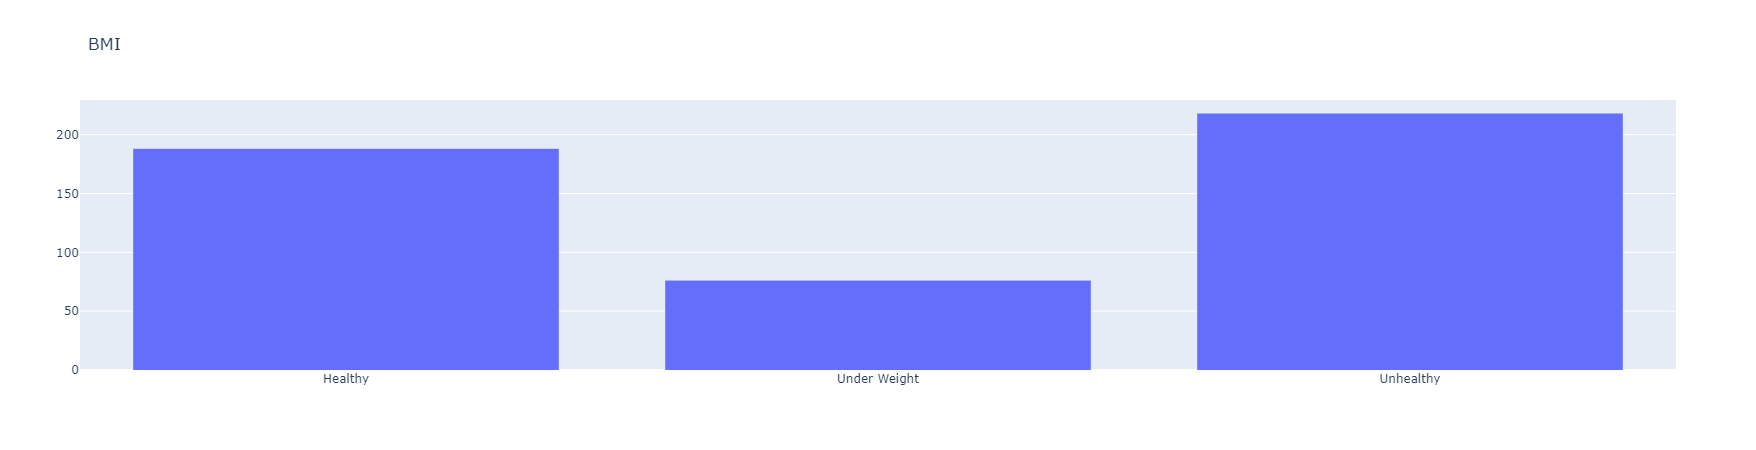

In [532]:
plot_data = [go.Histogram(x=y_test )]

plot_layout = go.Layout(title='BMI')
fig = go.Figure(data=plot_data,layout=plot_layout)
pyoff.iplot(fig)

Summary: 
The model is not able to differentiate Underweight from non Underweight BMI(did not predict non underweight class) , 
but is able predict Healthy and Unhealthy panelist's with an accuracy higher than using the majority of BMI

## Logistic Regression model

Since it is required for the features in a logisitc regression model to be independent, a correlation matrix will be used to remove correlated(more than 0.6) features

<AxesSubplot:>

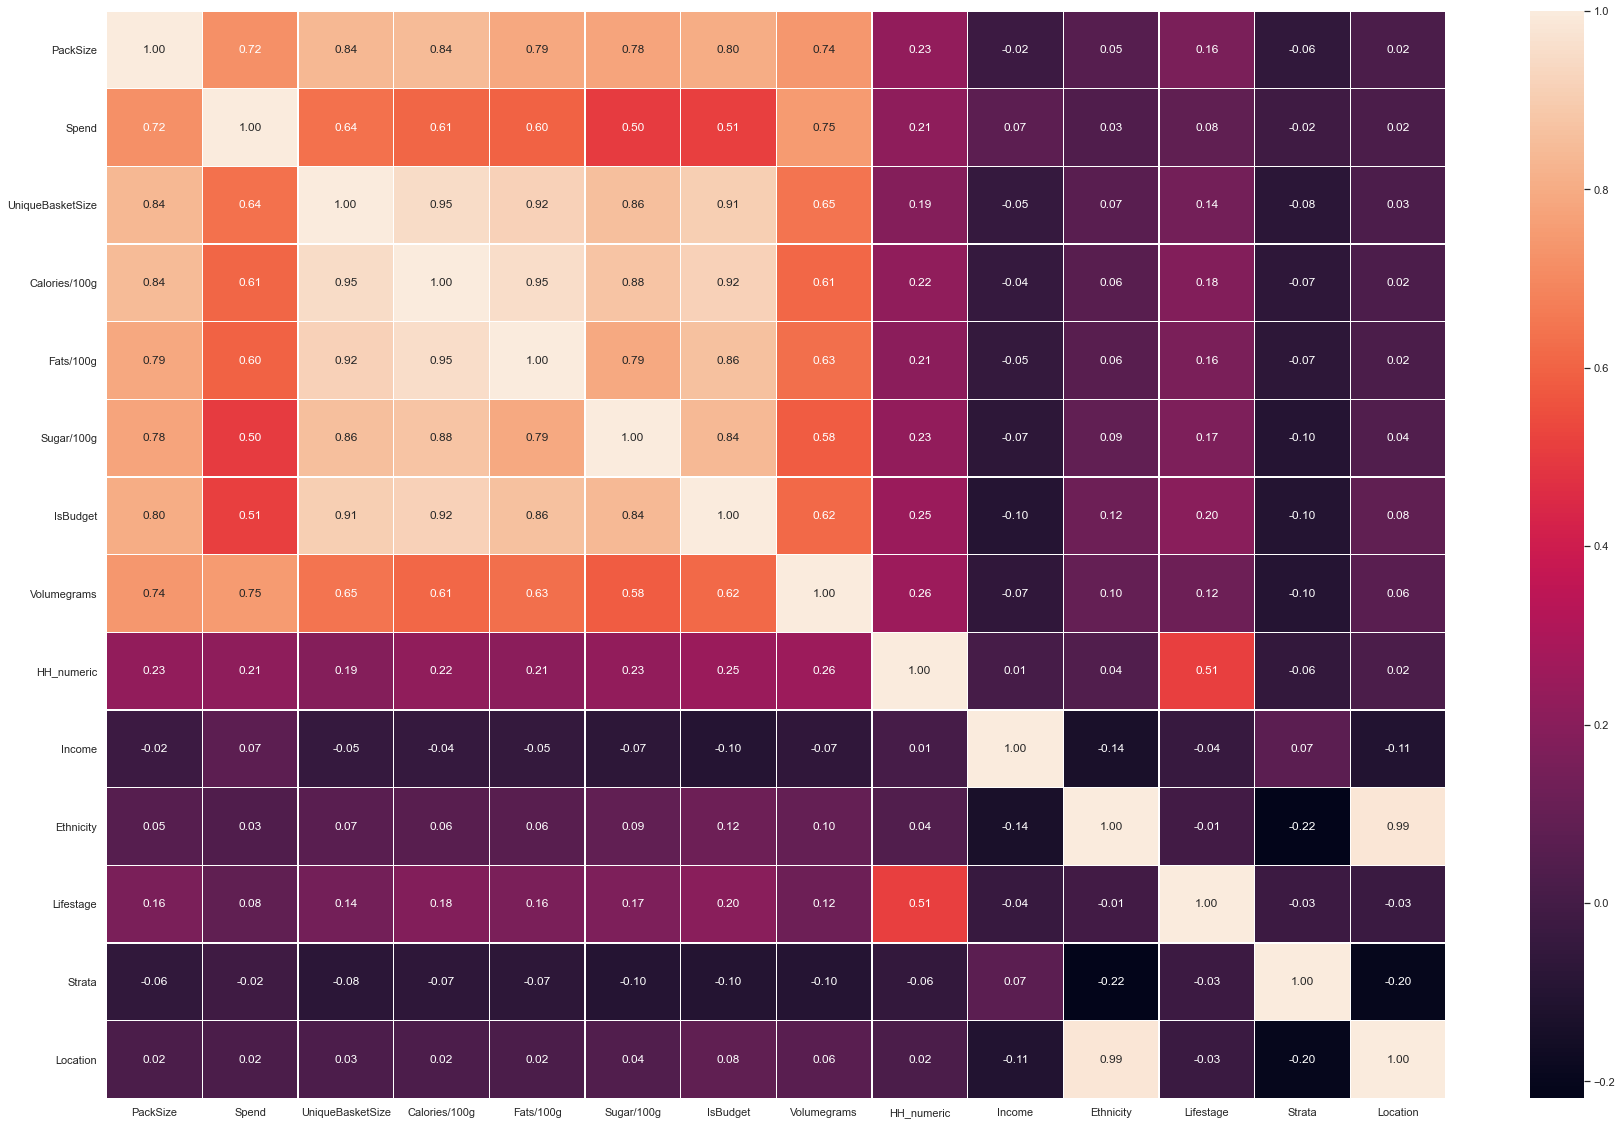

In [533]:
corr = panel_id_merged[panel_id_merged.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")


Remove correlated columns:
PackSize, Spend,UniqueBasketSize,Fats,Sugar,IsBudget

In [534]:
filtered_columns = ['Volumegrams', 'HH_numeric', 'Income',
       'Ethnicity', 'Lifestage', 'Strata', 'location']

In [535]:
# Create an instance of Logistic Regression Classifier and fit the data.
lfc = LogisticRegression(penalty = 'none', multi_class='multinomial',solver ='newton-cg', max_iter = 10000 )

lfc.fit(X_train[filtered_columns],y_train)

KeyError: "['location'] not in index"

<span style="color:red"> Error does sugges that the data does not fit well with logistic regression

#### Evaluation

In [ ]:
y_pred_lgr = np.array(lfc.predict(X_test[filtered_columns]))
y_true_lgr = y_test.copy()
cm = pd.DataFrame(confusion_matrix(y_pred_lgr, y_true_lgr))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]

display(cm)

print("Hamming loss:",round(hamming_loss(y_test,y_pred_lgr),4))
f1score = f1_score(y_true_lgr,y_pred_lgr,labels=labels,average=None)
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])


In [ ]:
Underweight, Healthy, Unhealthy = multilabel_confusion_matrix(y_test,y_pred_lgr,labels=labels)

<b> Underweight Confusion Matrix</b>

In [ ]:
cols = ['Predicted Y=0','Predicted Y=1']
ind = ['True Y=0','True Y=1']
df = pd.DataFrame(Underweight)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Underweight.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

<b> Healthy people's score </b>

In [ ]:
df = pd.DataFrame(Healthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Healthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

<b> Unhealthy people's score </b>

In [ ]:
df = pd.DataFrame(Unhealthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Unhealthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

Underweight people's score

## ADA boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


#### Plot  of score against n_estimators

In [ ]:
n_est = []
score = []
for i in range(50,500,10):
    adc = AdaBoostClassifier(random_state=3101,n_estimators=i)
    adc.fit(X_train, y_train)
    pred = adc.predict(X_test)
    score.append(accuracy_score(y_test, pred))
    ###
    n_est.append(i)
d = pd.DataFrame({'score':pd.Series(score), 
    'n_est':pd.Series(n_est)})

# visualizing changes in parameters
plt.plot('n_est', 'score',data=d, label='Ada')
plt.xlabel('n_est')
plt.ylabel('accuracy')
plt.legend()


In [ ]:
print("best n_est:", d.sort_values(by = 'score', ascending = False).iloc[0,1])

From the plot of number of estimators against accuracy, the best number of estimators for adaboost was at 140

In [ ]:
adc = AdaBoostClassifier(n_estimators=190, random_state=3101)
adc.fit(X_train, y_train)

#### Classification Report

In [ ]:
y_pred_adc = np.array(adc.predict(X_test))
y_test_adc = y_test.copy()


cm = pd.DataFrame(confusion_matrix(y_test,y_pred_adc,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred_adc),4))
f1score = f1_score(y_test,y_pred_adc,labels=labels,average=None)
print('F1-Scores:')

for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(adc)

In [ ]:
y_test.value_counts()

Multilabel Confusion Matrix

In [ ]:
Underweight, Healthy, Unhealthy = multilabel_confusion_matrix(y_test,y_pred_adc,labels=labels)

<b> Underweight people's confusion matrix </b>

In [ ]:
cols = ['Predicted Y=0','Predicted Y=1']
ind = ['True Y=0','True Y=1']
df = pd.DataFrame(Underweight)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Underweight.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

Again, the adaboost model is predicting most of the panelists as not having an Underweight BMI, which suggests that adaboost does not have a good split on the data/ features do not give a good split on the data for sufficient information gain

<b> Healthy people's confusion matrix </b>

In [ ]:
df = pd.DataFrame(Healthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Healthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

<b> Unhealthy people's score </b>

In [ ]:
df = pd.DataFrame(Unhealthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Unhealthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

# Feature importance exploration and validation
Are the model's results valid?

In predicting BMI for each panelist, the important features from <code>feature_imp</code>    
AdaBoost - Sugar/100g, Fats/100g, Volumegrams, Spend, Unique Basket size     
Decision trees - Ethnicity, IsBudget, VolumeGrams,basketSize, location ,Sugar/100g, Fats/100g    
Logistic regression(Done in R) - Ethnicity, UniqueBasketSize, IsBudget, VolumeGrams   


# Retraining models on categorical features only

From the hypotheses in Exploratory Data Analysis, there appears to be no distint difference in the distributions for each BMI category vs each feature. Coupled with a majority of panelists having a Healthy BMI, it would be expected that the models are unable to accurately(80%), and with an accuracy just about 0.5 which is just as good as predicting everyone's BMI on the majority class(Healthy)      

Using categorical features only this time since numerical features used appeared to have a high correlation

In [ ]:
panel_id = panel_id_categorical.drop('Panel ID',1)

In [ ]:
panel_id.head()

##  Data Preparation
BMI - label-encoding
Income - label-encoding from lowest to highest     
Ethnicity - one-hot encoding    
Lifestage - one-hot encoding    
Strata - one-hot encoding     
location - one-hot encoding     
#HH_numeric - already numerical    

Label Encode

Income

In [ ]:
panel_id['Income'] = panel_id['Income'].apply(lambda x: ['Income < 1500','Income 1500 - 1999','Income 2000 - 2999','Income 3000 - 3999','Income 4000 - 4999','Income >5000'].index(x))

One Hot encode

In [ ]:
panel_id = pd.get_dummies(panel_id, columns = ['Ethnicity', 'Lifestage','Strata', 'Location'], drop_first = True)

In [ ]:
panel_id.head()

### Train Test Split for model

In [ ]:
# for labelEncoded data
#X_train, X_test, y_train, y_test = train_test_split(panel_id_merged.drop('BMI',1), panel_id_merged['BMI'], test_size=0.2, random_state=3101)
# for oneHotEncoded data
X_train, X_test, y_train, y_test = train_test_split(panel_id.drop('BMI',1), panel_id['BMI'], test_size=0.2, random_state=3101)

Feature importance function 

#### features and labels for multilabel confusion matrix and decision tree plots

In [ ]:
feature_cols = np.array(X_train.columns).tolist()
# original labels
# labels = ['Under Weight','Healthy','Over Weight','Obese']
# labels for bmi after merge
labels = ['Under Weight','Healthy','Unhealthy']

In [ ]:
#underweight,healthy,overweight,obese = multilabel_confusion_matrix(y_test,y_pred,labels=labels)
underweight,healthy,unhealthy= multilabel_confusion_matrix(y_test,y_pred,labels=labels)
cols = ['Predicted Y=0','Predicted Y=1']
ind = ['True Y=0','True Y=1']

## Decision Trees

Two models - one to minimize entropy and one to minimize gini will be used.   


#### Decision-Tree Model 1: Decision Tree built on minimising the gini index

In [ ]:
clf1 = tree.DecisionTreeClassifier(random_state=3101,criterion='gini')
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_pred,labels=labels))
cm.columns = [' '.join(['Predicted',s]) for s in labels]
cm.index = [' '.join(['True',s]) for s in labels]
display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))
f1score = f1_score(y_test,y_pred,labels=labels,average=None)
print('F1-Scores:')

for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])
feature_imp(clf1)

#### Logistic regression


In [ ]:
# Create an instance of Logistic Regression Classifier and fit the data.
lfc = LogisticRegression(penalty = 'none', multi_class='multinomial',solver ='newton-cg', max_iter = 10000 )

lfc.fit(X_train,y_train)

In [ ]:
y_pred_lgr = np.array(lfc.predict(X_test))
y_true_lgr = y_test.copy()
cm = pd.DataFrame(confusion_matrix(y_pred_lgr, y_true_lgr))
cm.index = [' '.join(['Predicted',s]) for s in labels]
cm.columns = [' '.join(['True',s]) for s in labels]

display(cm)
print("Accuracy:",round(accuracy_score(y_test,y_pred_lgr),4))
print("Hamming loss:",round(hamming_loss(y_test,y_pred_lgr),4))
f1score = f1_score(y_true_lgr,y_pred_lgr,labels=labels,average=None)
for i in range(cm.shape[0]):
    print(f"  %-12s {f1score[i]}" % labels[i])


In [ ]:
Underweight, Healthy, Unhealthy = multilabel_confusion_matrix(y_test,y_pred_lgr,labels=labels)

<b> Underweight Confusion Matrix</b>

In [ ]:
cols = ['Predicted Y=0','Predicted Y=1']
ind = ['True Y=0','True Y=1']
df = pd.DataFrame(Underweight)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Underweight.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

<b> Healthy people's score </b>

In [ ]:
df = pd.DataFrame(Healthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Healthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

<b> Unhealthy people's score </b>

In [ ]:
df = pd.DataFrame(Unhealthy)
df.columns = cols
df.index = ind
display(df)
tn, fp, fn, tp = Unhealthy.ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
accuracy = (tn+tp)/(tn+fp+fn+tp)
print('Specificity:',specificity)
print('Sensitivity:',sensitivity)
print('Accuracy:', accuracy)

# Recommendations



The features are not enough for a model to accurately predict an unknow panelists' BMI score.. This can be supported by the plots in Exploratory Data Abalysis section that does not suggest a distinguishable trend between any of the panelists' features and different BMI categories. 
though the features do not give a high accuracy(0.8) score, hence having more features related to  can be provided.   
BMI may also not be a good metric to measure if the panelist is healthy (its features of Weight and height may disproportionately unbalance the BMI, eg overweight but tall person ) .    
Hence having more features being more specific to the panelist's health such as Weight,Height, 